In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [107]:
#Dataframe preguntas y respuestas que se esperan de los modelos
df_preguntas_respuestas = pd.read_csv("preguntas_respuestas.csv")
df_preguntas_respuestas

num_pregunta                                           pregunta  \
0    Pregunta 1  ¿Cómo puedo llegar desde la estación AA1SC a l...   
1    Pregunta 2  ¿Qué estaciones debo usar para transferirme en...   
2    Pregunta 3  Quiero ir de la estación VF6SC a la estación R...   
3    Pregunta 4   ¿Cuál es la mejor ruta para ir de BD2VB a AC3SC?   
4    Pregunta 5  ¿Dime todas las rutas posibles para ir de BB2O...   
5    Pregunta 6  ¿Hay alguna estación que sirva como punto de c...   
6    Pregunta 7        ¿Cuál es la línea que tiene más estaciones?   
7    Pregunta 8    ¿Por cuántas estaciones pasan más de una línea?   
8    Pregunta 9                                ¿Quiero ir a RD3VC?   
9   Pregunta 10  Estoy en la estación OA1SC, ¿cómo llego a la e...   
10  Pregunta 11                                    Estoy en OA1SC.   
11  Pregunta 12  Necesito ir a la estación BC3SC, ¿cómo llego a...   
12  Pregunta 13  ¿Cuántas estaciones hay en total en el sistema...   
13  Pregunta 14             ¿Cuántas líneas de metro hay en total?   
14  Pregunta 15  El día está soleado, ¿sabes si va a llover hoy...   

                                   respuesta_esperada  
0   Lo mas recomendable es coger la linea amarilla...  
1    Para transferirte entre la linea roja y naran...  
2    Para ir de la estación VF6SC a la estación RA...  
3    Hay dos opciones que te recomiendo:\n Si solo...  
4    Las opciones posibles para ir de BB2OC a AF6S...  
5   Si, la unica estación que sirve de conexión pa...  
6   La Linea  que tiene mas estaciones es la azul ...  
7   Existen 7 estaciones por las que pasan mas de ...  
8   No puedo ayudarte con eso, necesito un punto d...  
9   Existen varias formas de llevar de OA1SC a RG6...  
10  No puedo ayudarte con eso, necesito un punto d...  
11  No puedo ayudarte con eso, la estación VG7SC n...  
12  Hay un total de 25 estaciones en el sistema de...  
13  Hay un total de 5 líneas de metro: Amarilla, A...  
14  No puedo ayudarte con eso, solo puedo ayudarte...

In [108]:
df_resultados_experimentos = pd.read_csv("resultados_experimentos_modelos_prompts.csv")
df_resultados_experimentos

Modelo    Prompt  \
0        meta-llama_Llama-3.1-8B-Instruct  Prompt 1   
1        meta-llama_Llama-3.1-8B-Instruct  Prompt 1   
2        meta-llama_Llama-3.1-8B-Instruct  Prompt 1   
3        meta-llama_Llama-3.1-8B-Instruct  Prompt 1   
4        meta-llama_Llama-3.1-8B-Instruct  Prompt 1   
..                                    ...       ...   
355  mistralai_Ministral-8B-Instruct-2410  Prompt 6   
356  mistralai_Ministral-8B-Instruct-2410  Prompt 6   
357  mistralai_Ministral-8B-Instruct-2410  Prompt 6   
358  mistralai_Ministral-8B-Instruct-2410  Prompt 6   
359  mistralai_Ministral-8B-Instruct-2410  Prompt 6   

                                              Pregunta  \
0    ¿Cómo puedo llegar desde la estación AA1SC a l...   
1    ¿Qué estaciones debo usar para transferirme en...   
2    Quiero ir de la estación VF6SC a la estación R...   
3     ¿Cuál es la mejor ruta para ir de BD2VB a AC3SC?   
4    ¿Dime todas las rutas posibles para ir de BB2O...   
..                                                 ...   
355                                    Estoy en OA1SC.   
356  Necesito ir a la estación BC3SC, ¿cómo llego a...   
357  ¿Cuántas estaciones hay en total en el sistema...   
358             ¿Cuántas líneas de metro hay en total?   
359  El día está soleado, ¿sabes si va a llover hoy...   

                                             Respuesta  Tiempo_Respuesta  
0    Puedes llegar desde la estación AA1SC a la est...          7.270108  
1    Para transferirte entre las líneas Roja y Nara...          4.554835  
2    Para ir de la estación VF6SC a la estación RA1...          9.682744  
3    Para ir de BD2VB a AC3SC, puedes tomar la líne...          6.623010  
4    Una pregunta clara y concisa. Para ir de BB2OC...         11.741886  
..                                                 ...               ...  
355        ¡Hola! ¿A dónde te gustaría ir desde OA1SC?          3.388981  
356  No tengo información suficiente para sugerirte...          2.915161  
357  El sistema de metro tiene un total de 37 estac...          3.732006  
358  Hay en total 5 líneas de metro: Amarilla, Azul...          9.965416  
359  No puedo ayudarte con eso, solo puedo ayudarte...          7.224412  

[360 rows x 5 columns]

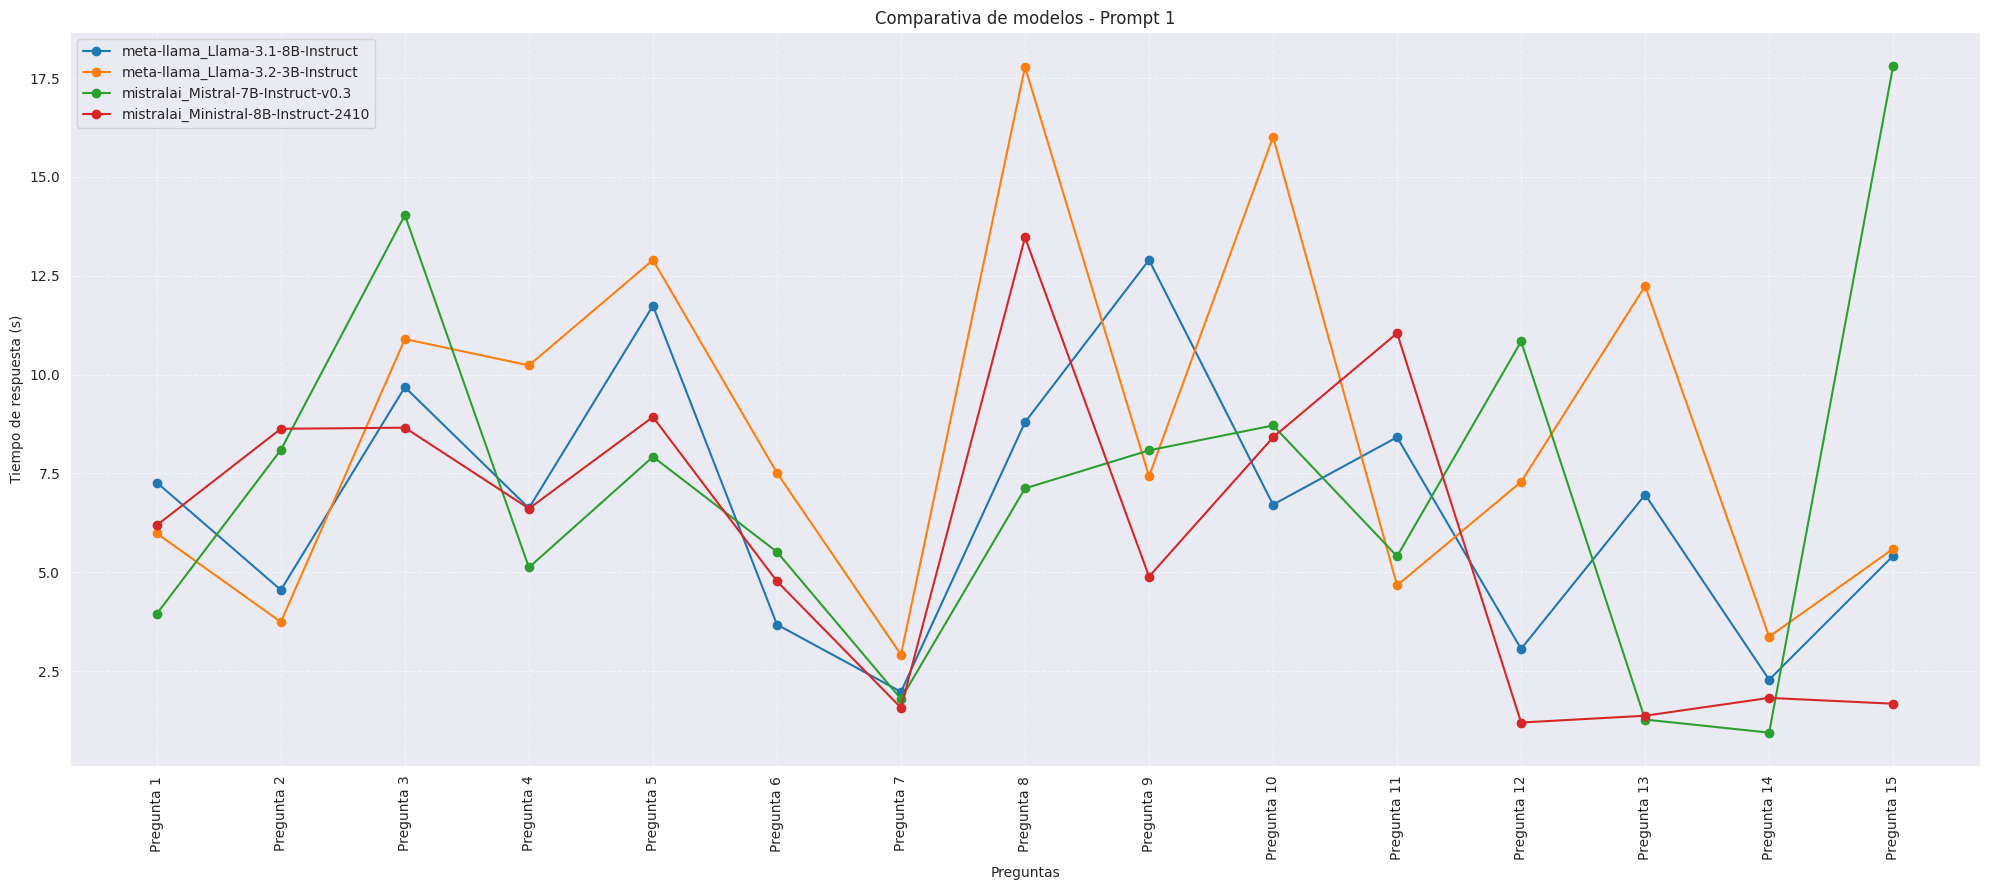

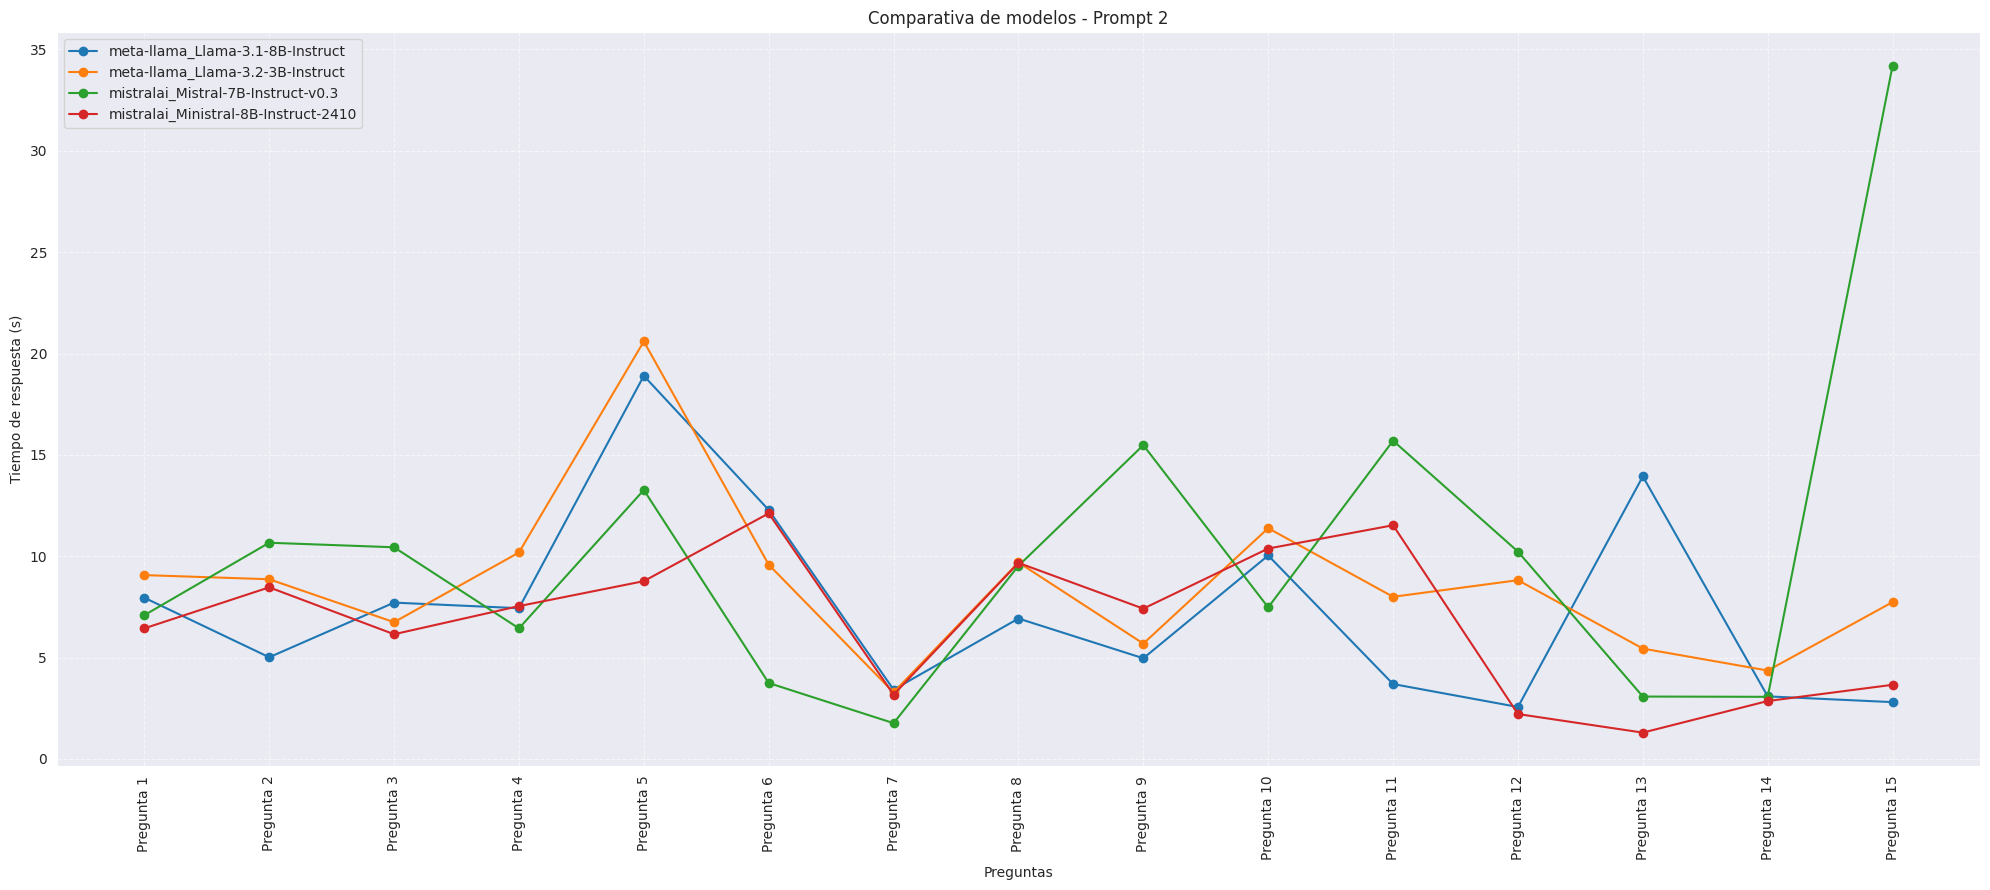

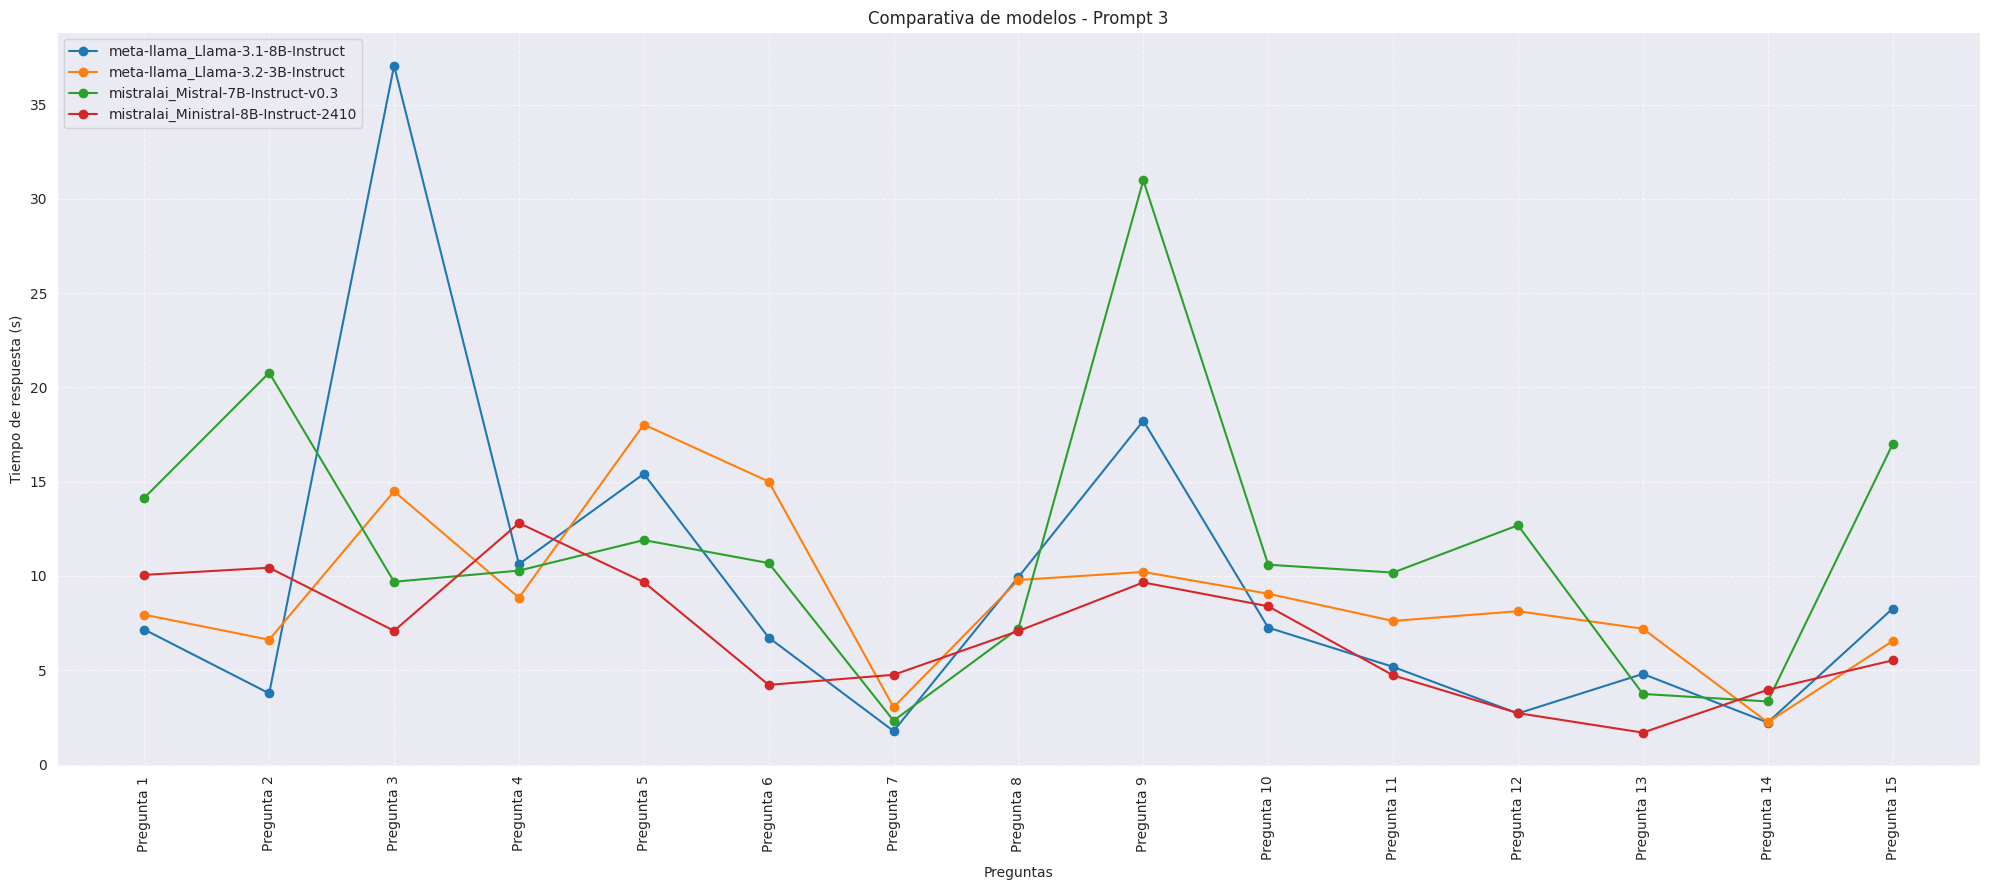

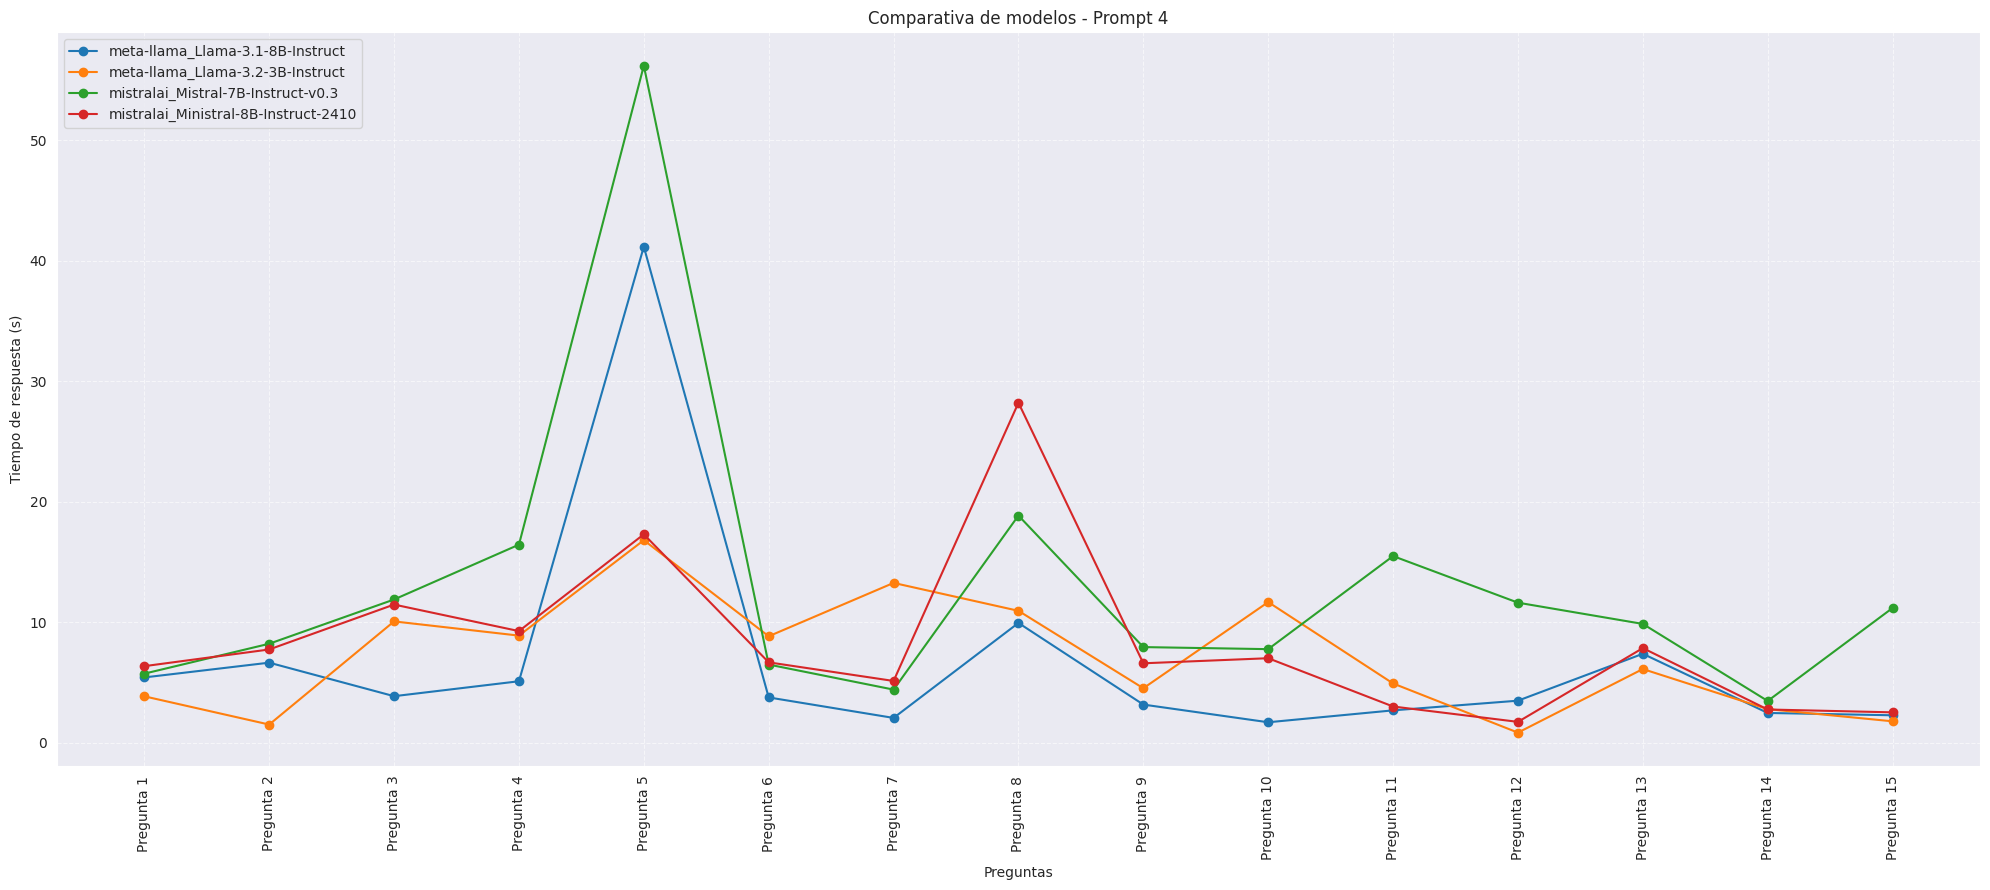

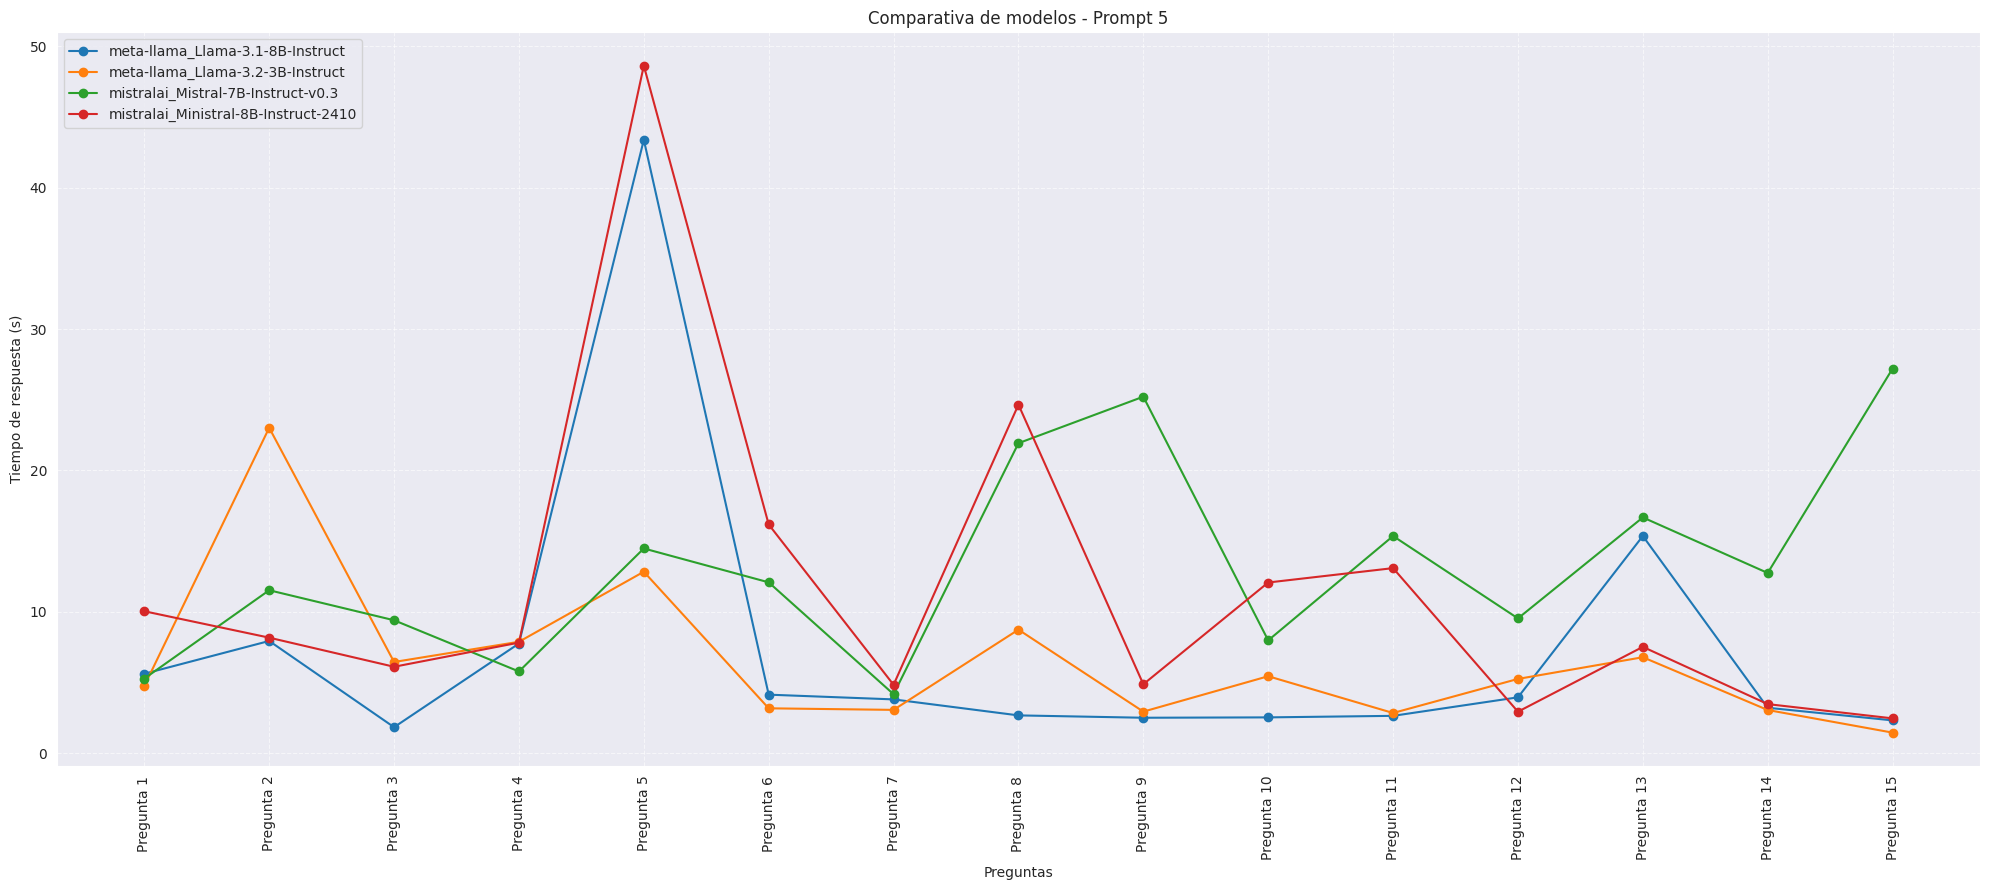

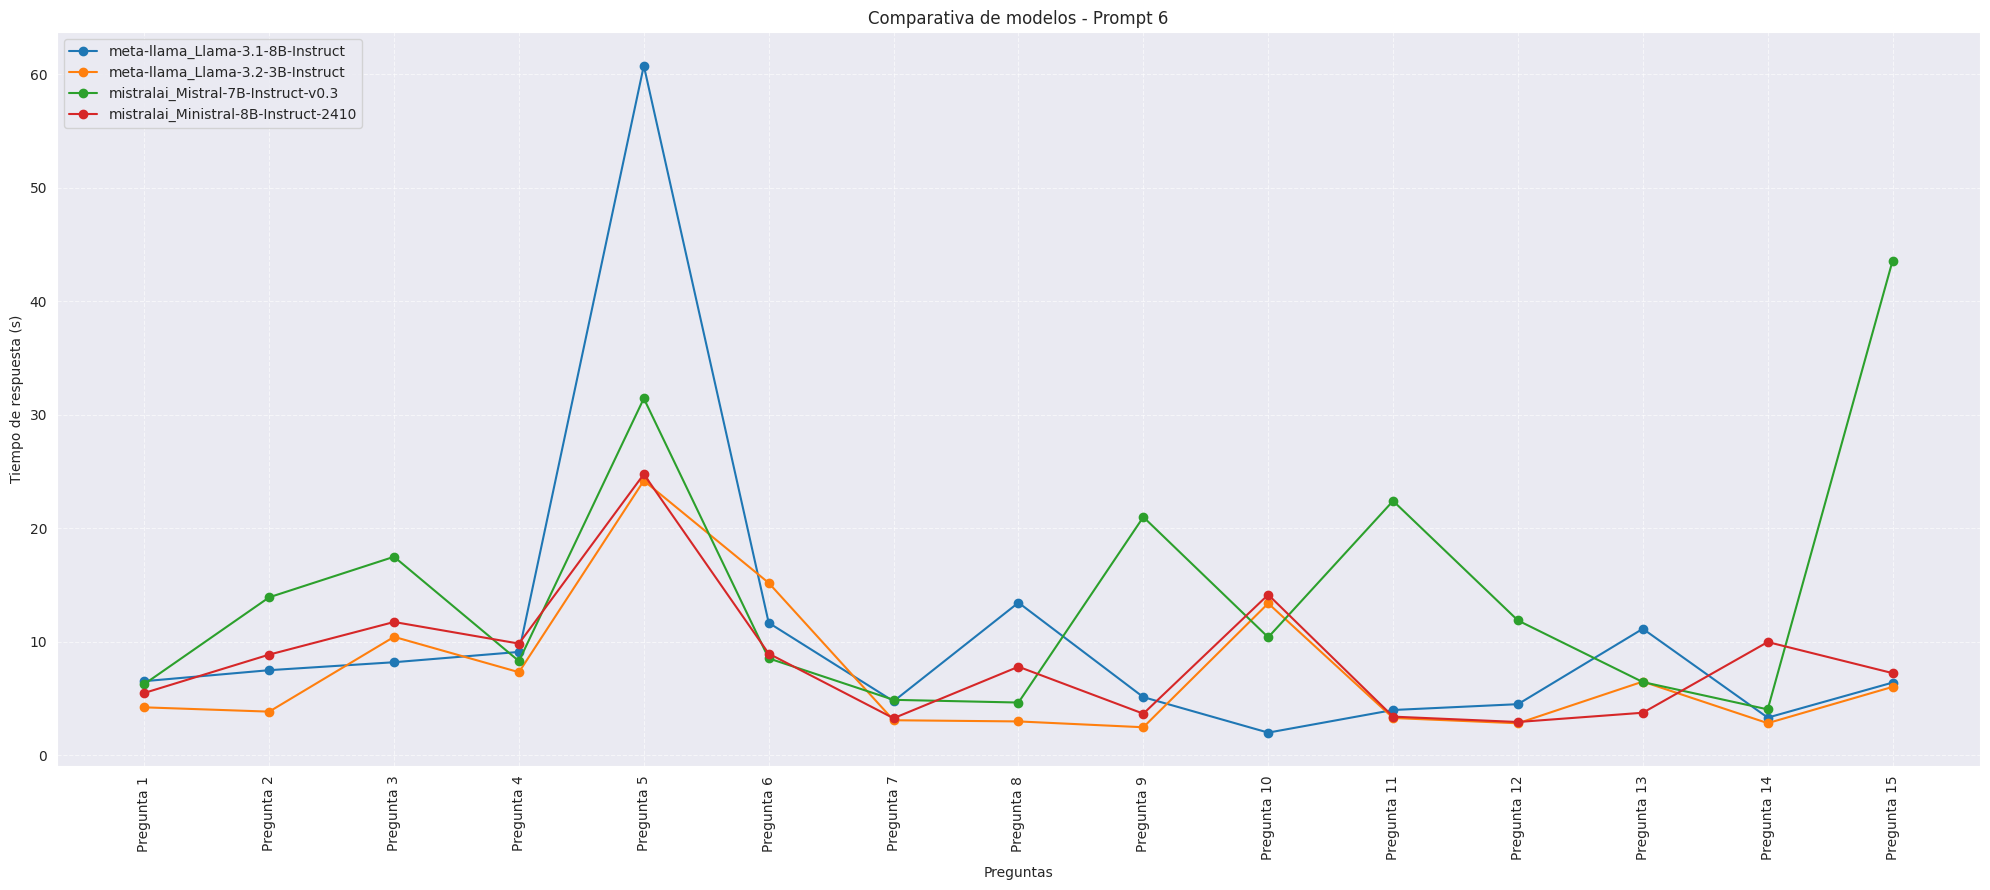

In [109]:
# === Lista de etiquetas para las preguntas ===
preguntas = [
    "Pregunta 1", "Pregunta 2", "Pregunta 3", "Pregunta 4", "Pregunta 5",
    "Pregunta 6", "Pregunta 7", "Pregunta 8", "Pregunta 9", "Pregunta 10",
    "Pregunta 11", "Pregunta 12", "Pregunta 13", "Pregunta 14", "Pregunta 15"
]

# === Gráficas comparativas: todos los modelos para un mismo prompt ===
prompts = df_resultados_experimentos["Prompt"].unique()

for prompt in prompts:
    plt.figure(figsize=(20, 9))
    df_prompt = df_resultados_experimentos[df_resultados_experimentos["Prompt"] == prompt]

    for modelo in df_prompt["Modelo"].unique():
        df_modelo = df_prompt[df_prompt["Modelo"] == modelo]
        plt.plot(
            range(1, len(df_modelo) + 1),
            df_modelo["Tiempo_Respuesta"],
            marker='o',
            linestyle='-',
            label=modelo
        )

    plt.xticks(range(1, len(df_prompt["Pregunta"].unique()) + 1),
               preguntas[:len(df_prompt["Pregunta"].unique())],
               rotation=90)
    plt.xlabel("Preguntas")
    plt.ylabel("Tiempo de respuesta (s)")
    plt.title(f"Comparativa de modelos - {prompt}")
    plt.legend(loc="upper left")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [110]:
df_evaluacion = df_resultados_experimentos.copy()

#Analisemos cuantas palabras tiene cada respuesta
def normalizar_texto(texto):
    """
    Normaliza texto: minúsculas, remueve puntuación y espacios extra.
    Adaptado para español (mantiene acentos básicos).
    """
    if pd.isna(texto) or texto == "":
        return ""
    texto = str(texto).lower().strip()
    texto = re.sub(r'[^\w\sáéíóúüñÁÉÍÓÚÜÑ]', ' ', texto)  # Remueve puntuación, mantiene acentos y ñ
    texto = re.sub(r'\s+', ' ', texto)  # Normaliza espacios
    return texto

df_evaluacion["numero_palabras_respuesta"] = df_evaluacion["Respuesta"].apply(lambda x: len(normalizar_texto(x).split()))
df_evaluacion


Modelo    Prompt  \
0        meta-llama_Llama-3.1-8B-Instruct  Prompt 1   
1        meta-llama_Llama-3.1-8B-Instruct  Prompt 1   
2        meta-llama_Llama-3.1-8B-Instruct  Prompt 1   
3        meta-llama_Llama-3.1-8B-Instruct  Prompt 1   
4        meta-llama_Llama-3.1-8B-Instruct  Prompt 1   
..                                    ...       ...   
355  mistralai_Ministral-8B-Instruct-2410  Prompt 6   
356  mistralai_Ministral-8B-Instruct-2410  Prompt 6   
357  mistralai_Ministral-8B-Instruct-2410  Prompt 6   
358  mistralai_Ministral-8B-Instruct-2410  Prompt 6   
359  mistralai_Ministral-8B-Instruct-2410  Prompt 6   

                                              Pregunta  \
0    ¿Cómo puedo llegar desde la estación AA1SC a l...   
1    ¿Qué estaciones debo usar para transferirme en...   
2    Quiero ir de la estación VF6SC a la estación R...   
3     ¿Cuál es la mejor ruta para ir de BD2VB a AC3SC?   
4    ¿Dime todas las rutas posibles para ir de BB2O...   
..                                                 ...   
355                                    Estoy en OA1SC.   
356  Necesito ir a la estación BC3SC, ¿cómo llego a...   
357  ¿Cuántas estaciones hay en total en el sistema...   
358             ¿Cuántas líneas de metro hay en total?   
359  El día está soleado, ¿sabes si va a llover hoy...   

                                             Respuesta  Tiempo_Respuesta  \
0    Puedes llegar desde la estación AA1SC a la est...          7.270108   
1    Para transferirte entre las líneas Roja y Nara...          4.554835   
2    Para ir de la estación VF6SC a la estación RA1...          9.682744   
3    Para ir de BD2VB a AC3SC, puedes tomar la líne...          6.623010   
4    Una pregunta clara y concisa. Para ir de BB2OC...         11.741886   
..                                                 ...               ...   
355        ¡Hola! ¿A dónde te gustaría ir desde OA1SC?          3.388981   
356  No tengo información suficiente para sugerirte...          2.915161   
357  El sistema de metro tiene un total de 37 estac...          3.732006   
358  Hay en total 5 líneas de metro: Amarilla, Azul...          9.965416   
359  No puedo ayudarte con eso, solo puedo ayudarte...          7.224412   

     numero_palabras_respuesta  
0                           52  
1                           51  
2                          103  
3                           65  
4                          107  
..                         ...  
355                          8  
356                          8  
357                         10  
358                         13  
359                         15  

[360 rows x 6 columns]

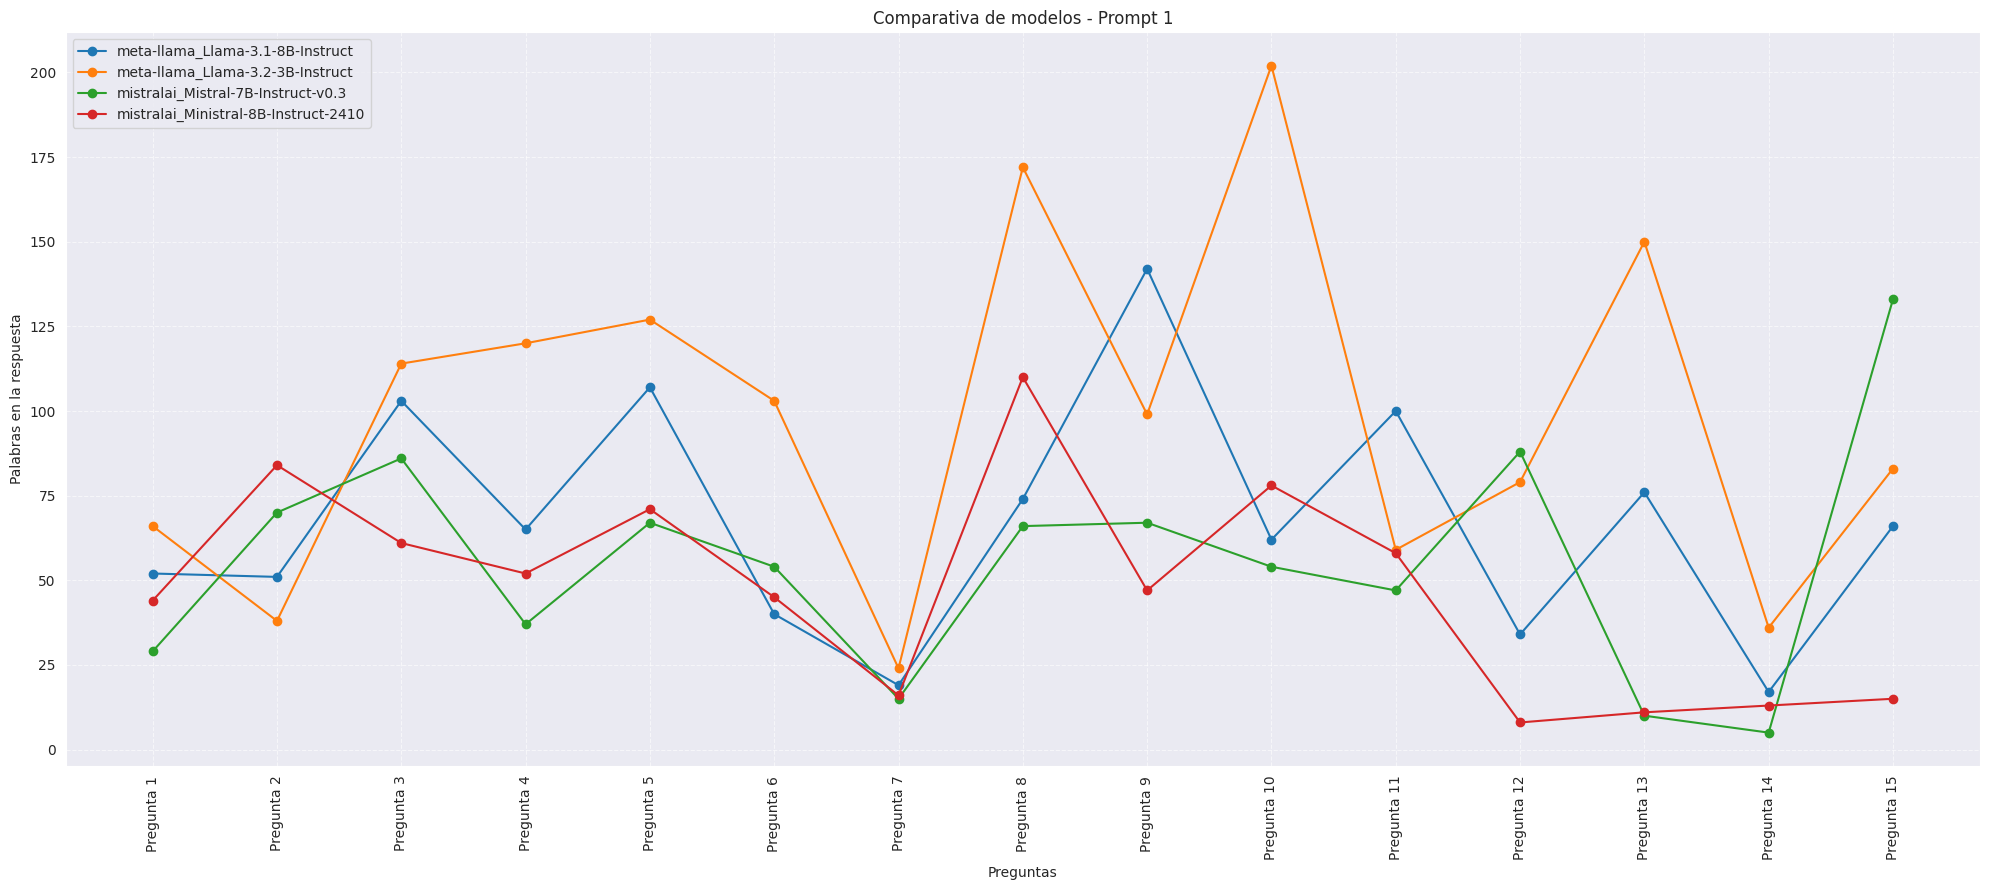

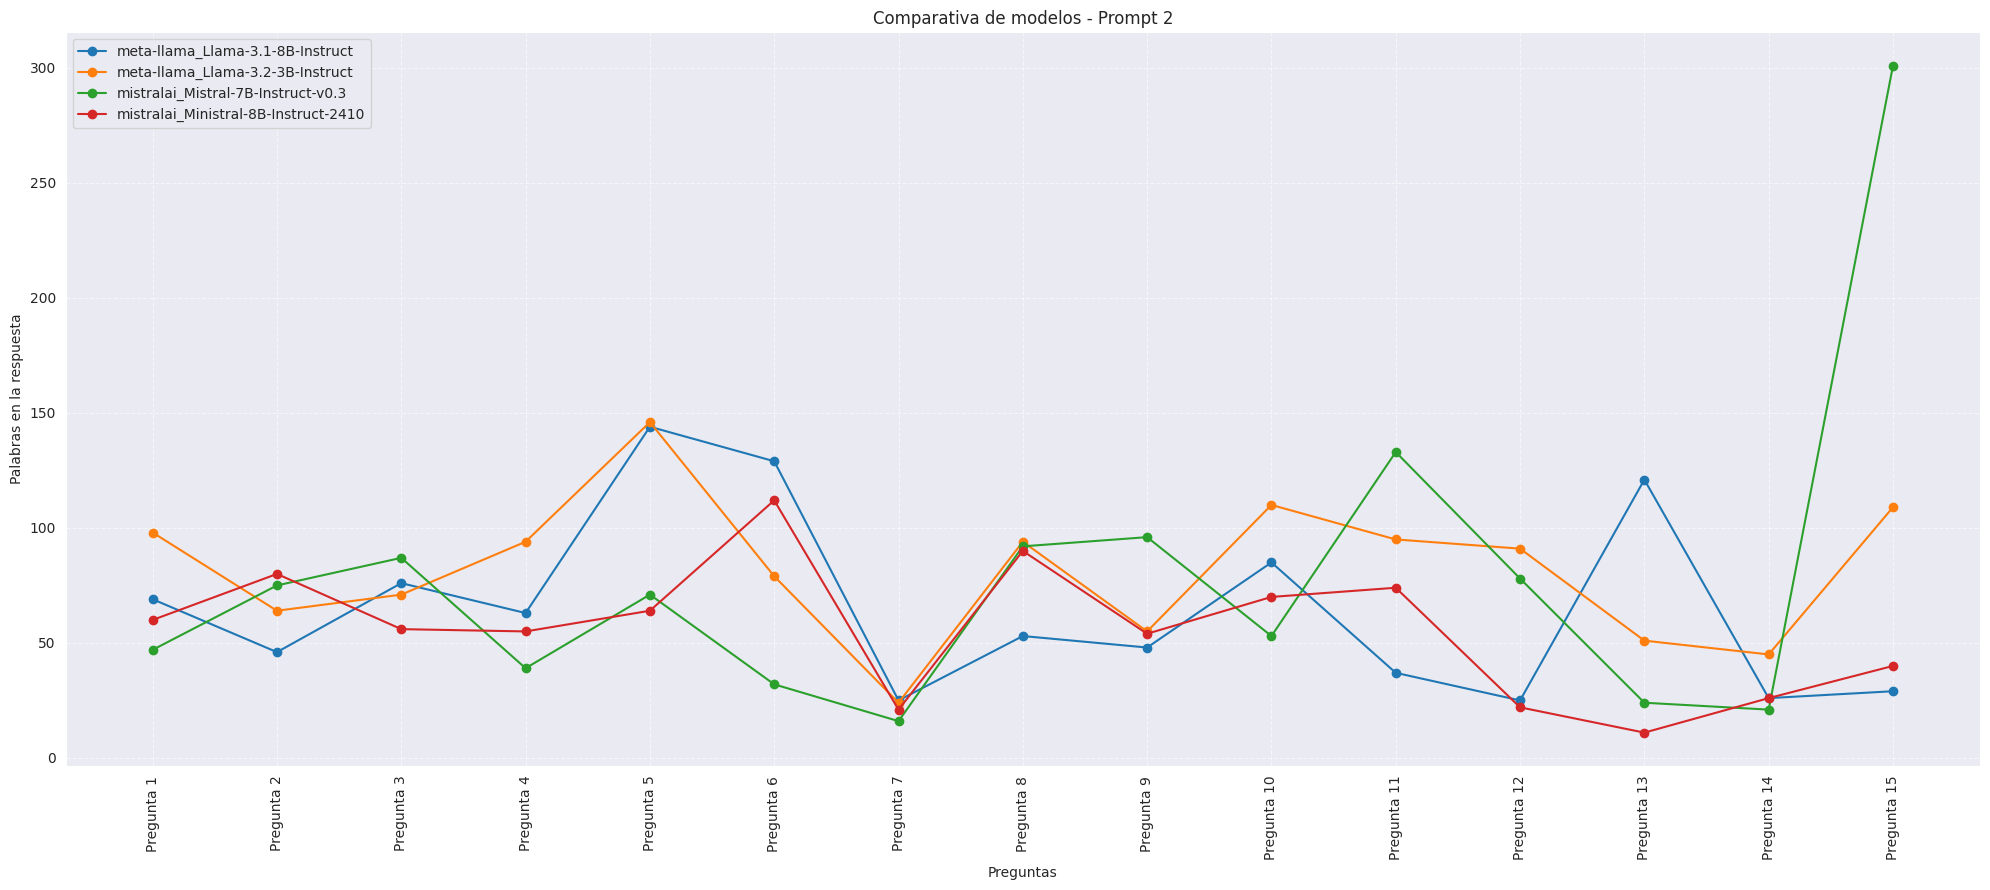

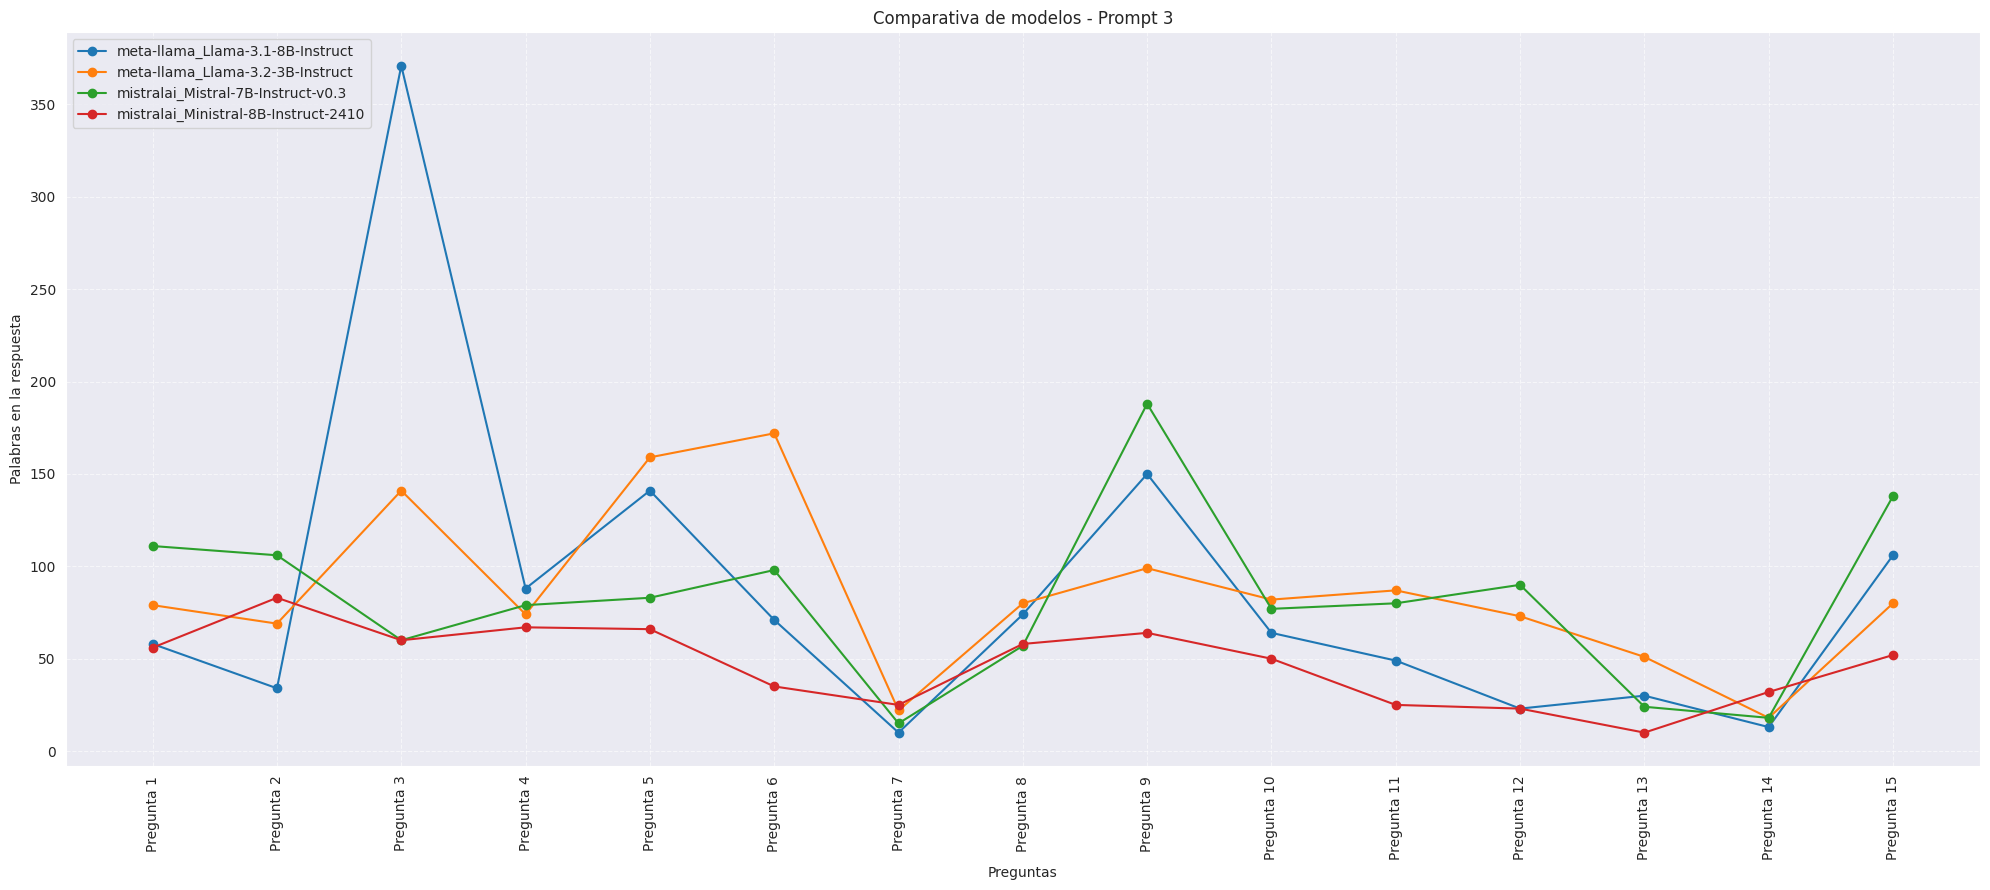

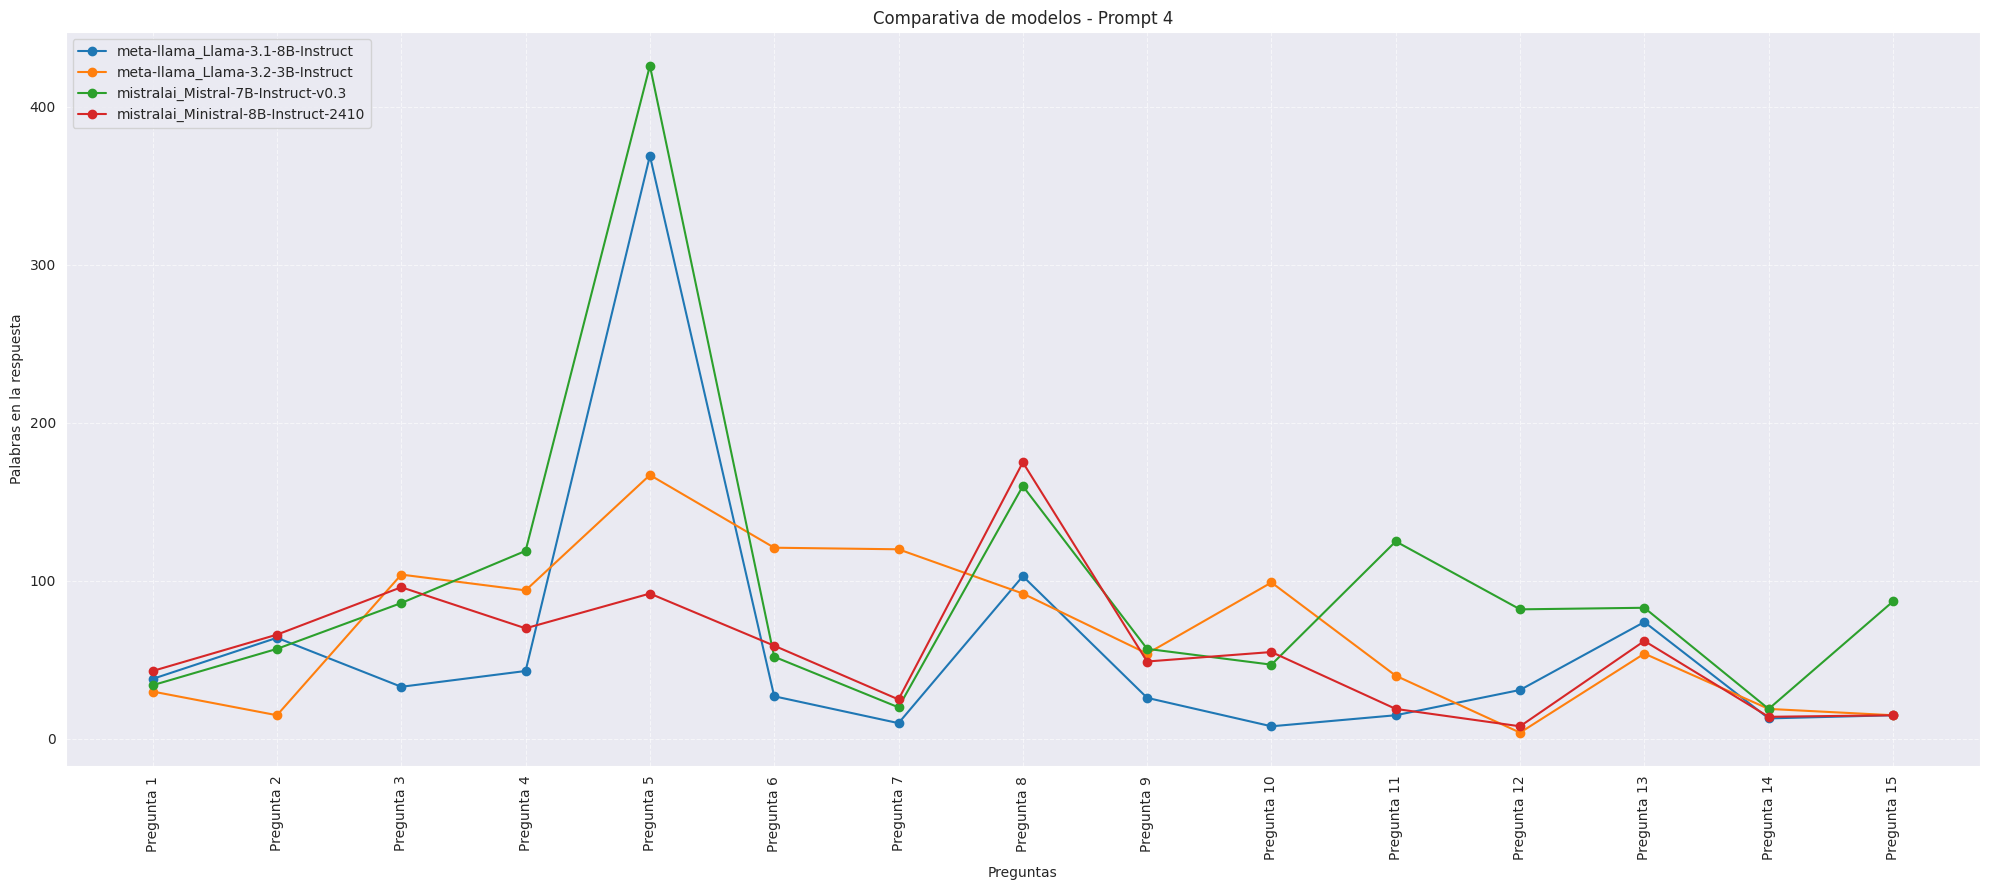

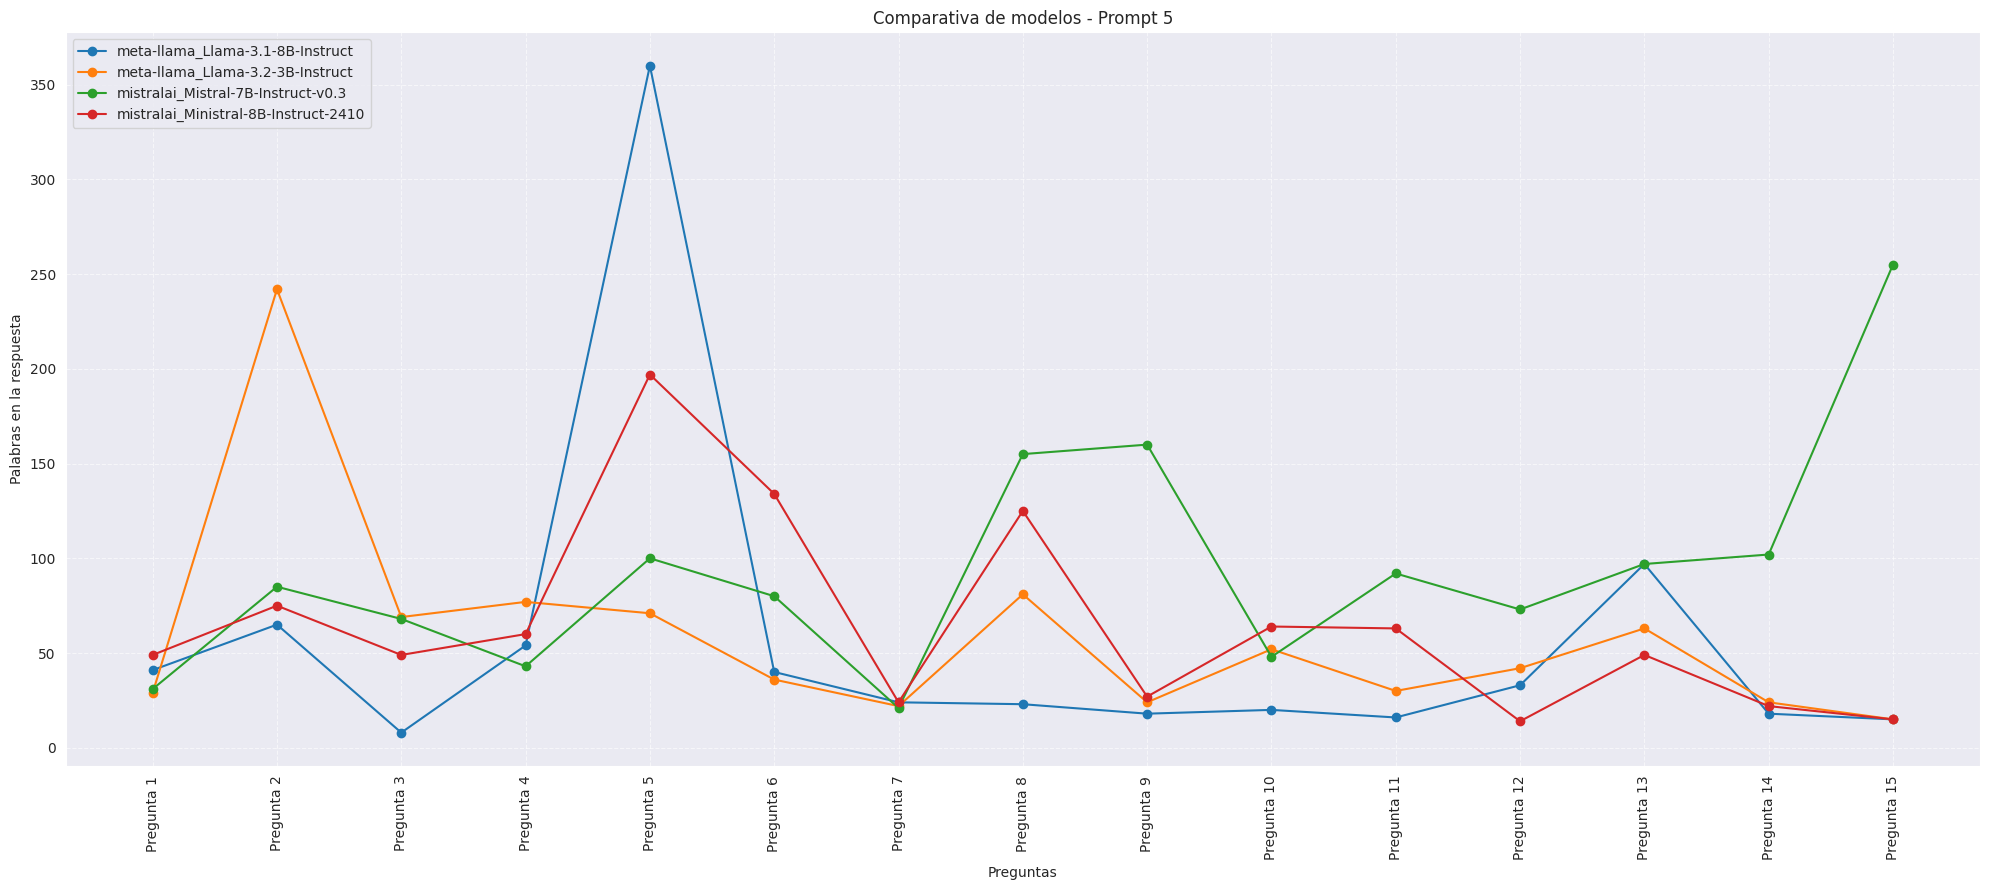

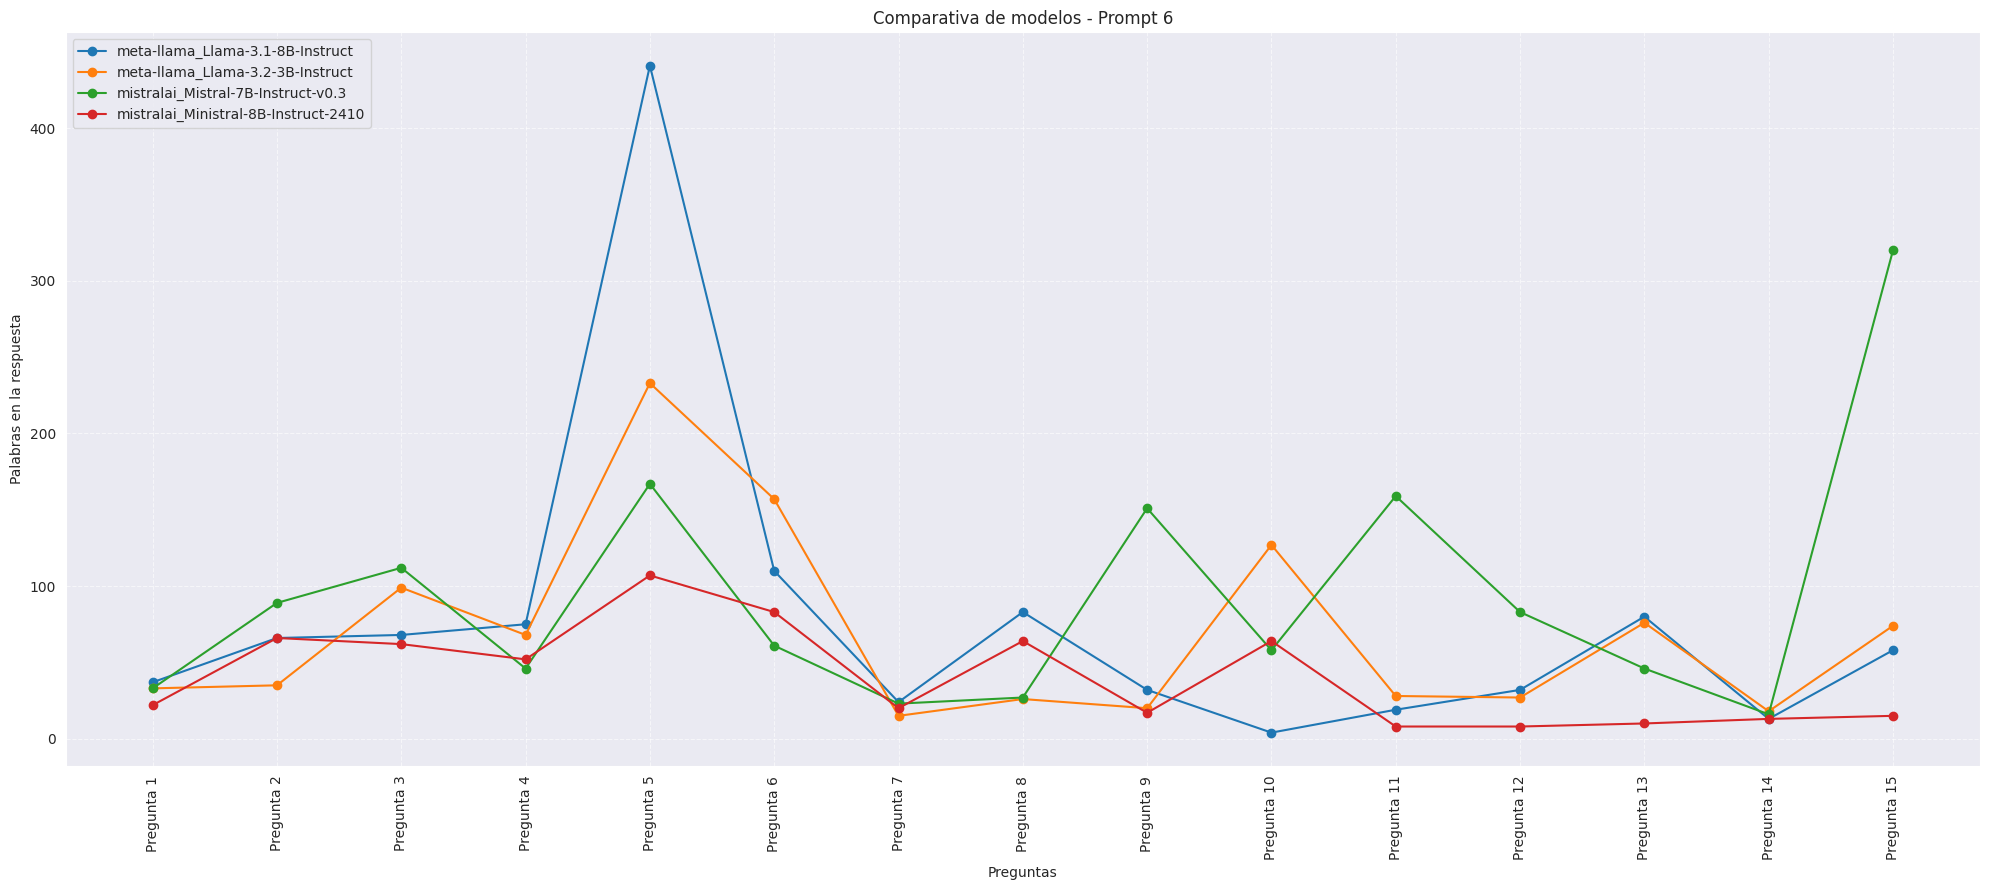

In [111]:
# === Lista de etiquetas para las preguntas ===
df_evaluacion_one=df_evaluacion.copy()
preguntas = [
    "Pregunta 1", "Pregunta 2", "Pregunta 3", "Pregunta 4", "Pregunta 5",
    "Pregunta 6", "Pregunta 7", "Pregunta 8", "Pregunta 9", "Pregunta 10",
    "Pregunta 11", "Pregunta 12", "Pregunta 13", "Pregunta 14", "Pregunta 15"
]

# === Gráficas comparativas: todos los modelos para un mismo prompt ===
prompts = df_evaluacion_one["Prompt"].unique()

for prompt in prompts:
    plt.figure(figsize=(20, 9))
    df_prompt = df_evaluacion_one[df_evaluacion_one["Prompt"] == prompt]

    for modelo in df_prompt["Modelo"].unique():
        df_modelo = df_prompt[df_prompt["Modelo"] == modelo]
        plt.plot(
            range(1, len(df_modelo) + 1),
            df_modelo["numero_palabras_respuesta"],
            marker='o',
            linestyle='-',
            label=modelo
        )

    plt.xticks(range(1, len(df_prompt["Pregunta"].unique()) + 1),
               preguntas[:len(df_prompt["Pregunta"].unique())],
               rotation=90)
    plt.xlabel("Preguntas")
    plt.ylabel("Palabras en la respuesta")
    plt.title(f"Comparativa de modelos - {prompt}")
    plt.legend(loc="upper left")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [112]:
df_resultados_deberta=pd.read_csv("resultados_mdeberta_two.csv")
df_resultados_deberta

modelo  \
0        meta-llama_Llama-3.1-8B-Instruct   
1        meta-llama_Llama-3.1-8B-Instruct   
2        meta-llama_Llama-3.1-8B-Instruct   
3        meta-llama_Llama-3.1-8B-Instruct   
4        meta-llama_Llama-3.1-8B-Instruct   
..                                    ...   
355  mistralai_Ministral-8B-Instruct-2410   
356  mistralai_Ministral-8B-Instruct-2410   
357  mistralai_Ministral-8B-Instruct-2410   
358  mistralai_Ministral-8B-Instruct-2410   
359  mistralai_Ministral-8B-Instruct-2410   

                                              pregunta    prompt  es_correcta  \
0    ¿Cómo puedo llegar desde la estación AA1SC a l...  Prompt 1         True   
1    ¿Qué estaciones debo usar para transferirme en...  Prompt 1        False   
2    Quiero ir de la estación VF6SC a la estación R...  Prompt 1        False   
3     ¿Cuál es la mejor ruta para ir de BD2VB a AC3SC?  Prompt 1        False   
4    ¿Dime todas las rutas posibles para ir de BB2O...  Prompt 1        False   
..                                                 ...       ...          ...   
355                                    Estoy en OA1SC.  Prompt 6         True   
356  Necesito ir a la estación BC3SC, ¿cómo llego a...  Prompt 6         True   
357  ¿Cuántas estaciones hay en total en el sistema...  Prompt 6        False   
358             ¿Cuántas líneas de metro hay en total?  Prompt 6         True   
359  El día está soleado, ¿sabes si va a llover hoy...  Prompt 6         True   

     confianza  prob_entailment  prob_neutral  prob_contradiction  
0     0.969209         0.969209      0.029020            0.001771  
1     0.564096         0.564096      0.303615            0.132289  
2     0.010571         0.010571      0.984582            0.004847  
3     0.479395         0.479395      0.156010            0.364596  
4     0.045840         0.045840      0.041085            0.913074  
..         ...              ...           ...                 ...  
355   0.982610         0.982610      0.014984            0.002407  
356   0.981620         0.981620      0.016719            0.001661  
357   0.000500         0.000500      0.001005            0.998494  
358   0.981166         0.981166      0.015606            0.003228  
359   0.963898         0.963898      0.022883            0.013219  

[360 rows x 8 columns]

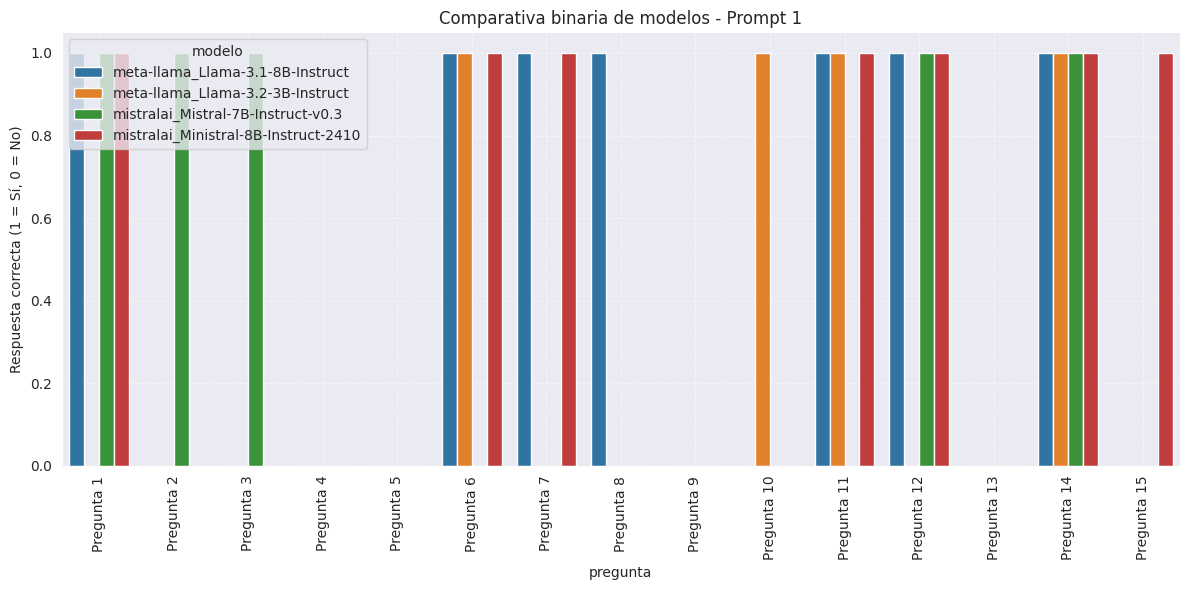

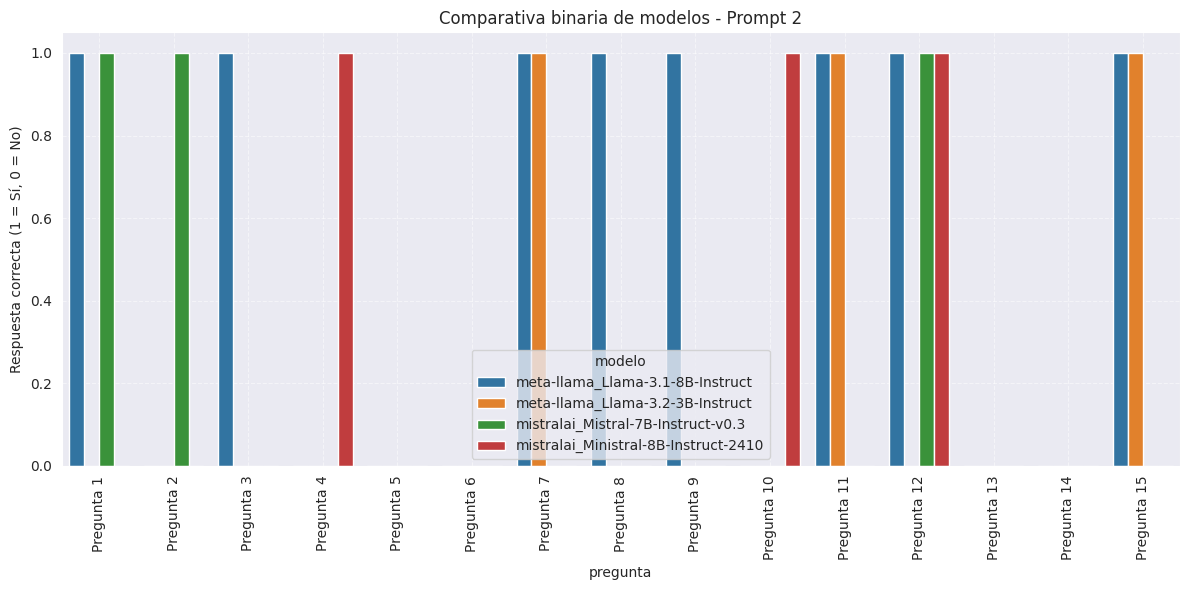

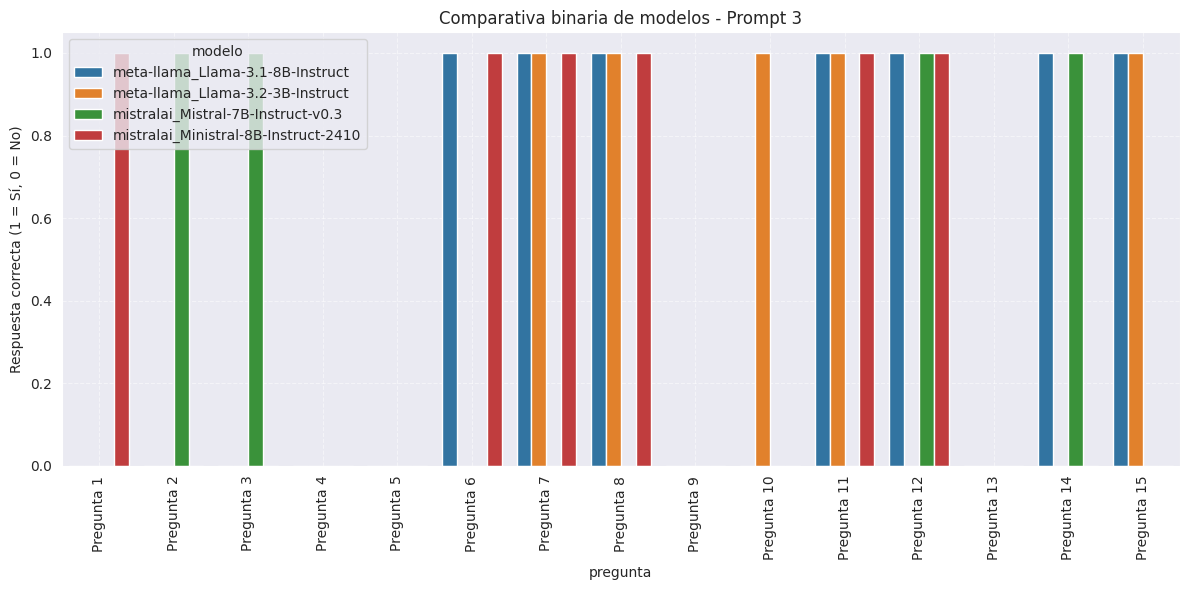

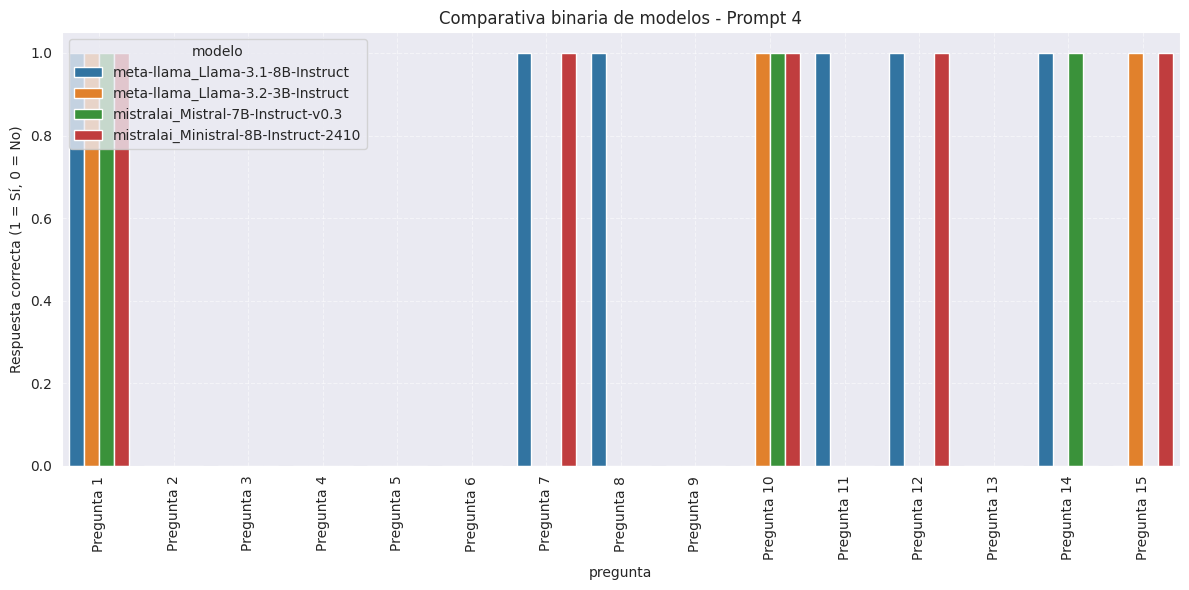

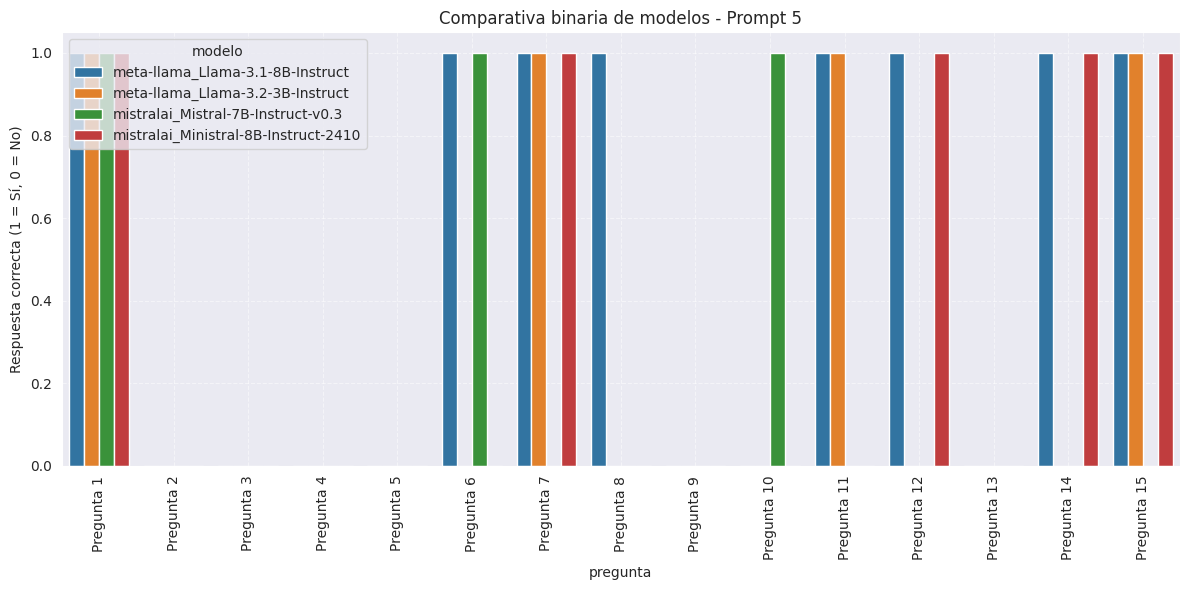

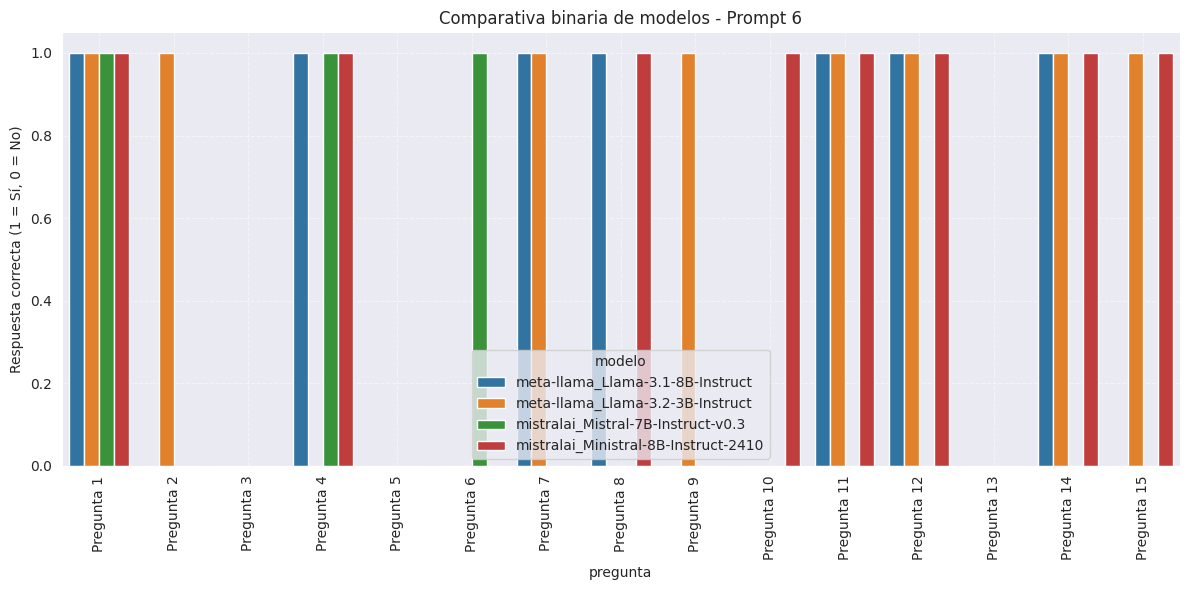

In [113]:
df_deberta_one=df_resultados_deberta.copy()
preguntas = [
    "Pregunta 1", "Pregunta 2", "Pregunta 3", "Pregunta 4", "Pregunta 5",
    "Pregunta 6", "Pregunta 7", "Pregunta 8", "Pregunta 9", "Pregunta 10",
    "Pregunta 11", "Pregunta 12", "Pregunta 13", "Pregunta 14", "Pregunta 15"
]

# === Gráficas comparativas: todos los modelos para un mismo prompt ===
for prompt in prompts:
    df_prompt = df_deberta_one[df_deberta_one["prompt"] == prompt]

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_prompt, x="pregunta", y="es_correcta", hue="modelo", errorbar=None)

    plt.xticks(range(0, len(df_prompt["pregunta"].unique())),
               preguntas[:len(df_prompt["pregunta"].unique())],
               rotation=90)
    plt.ylabel("Respuesta correcta (1 = Sí, 0 = No)")
    plt.title(f"Comparativa binaria de modelos - {prompt}")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

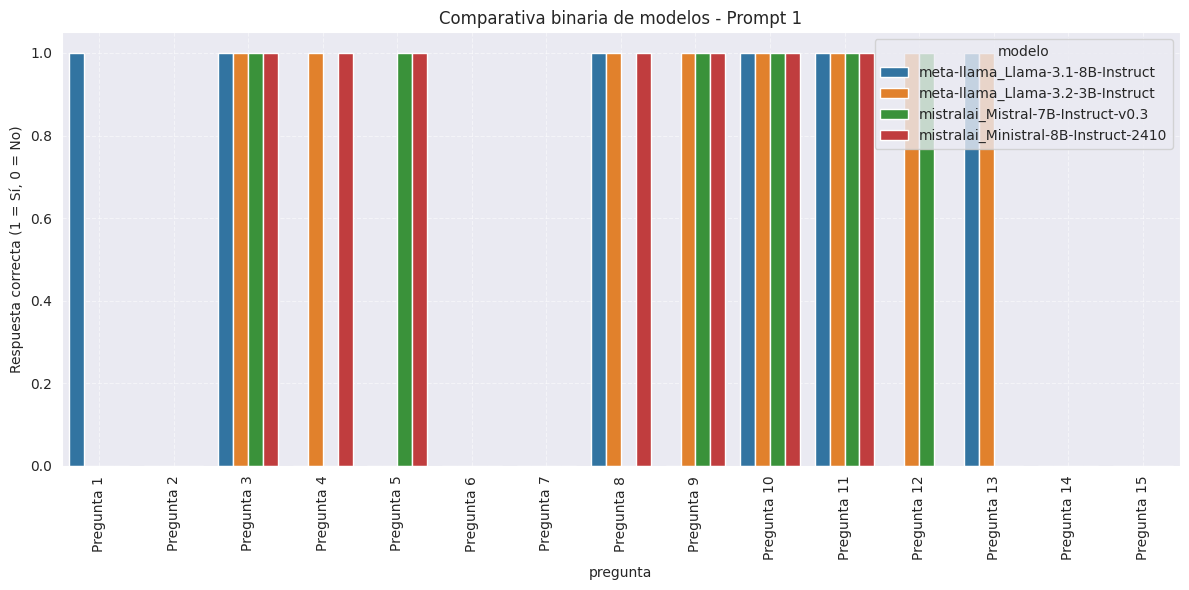

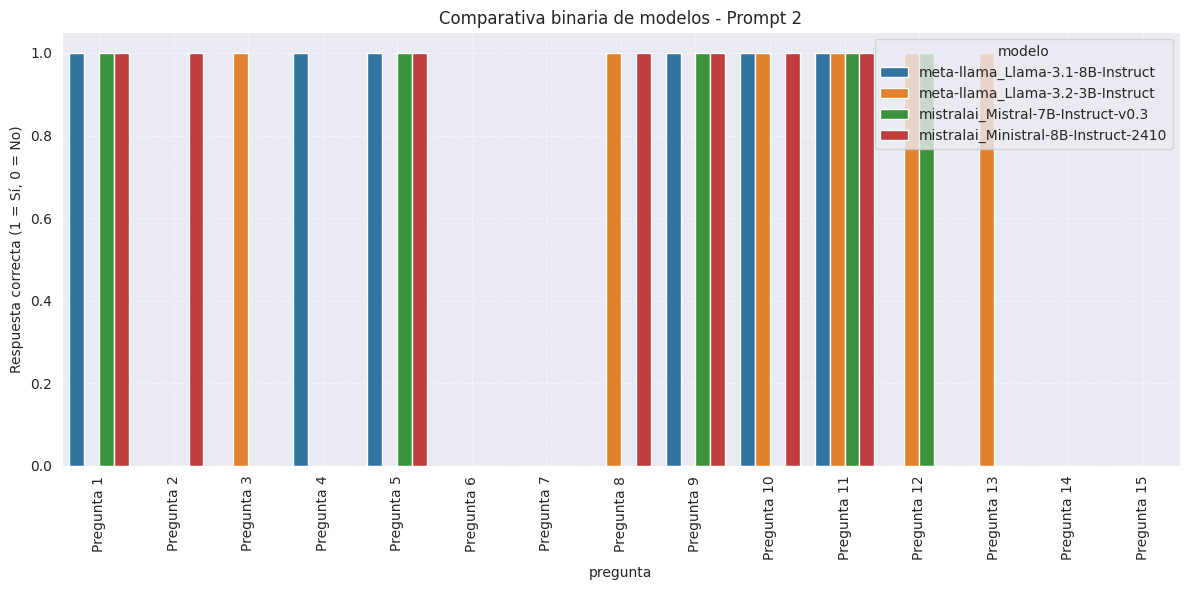

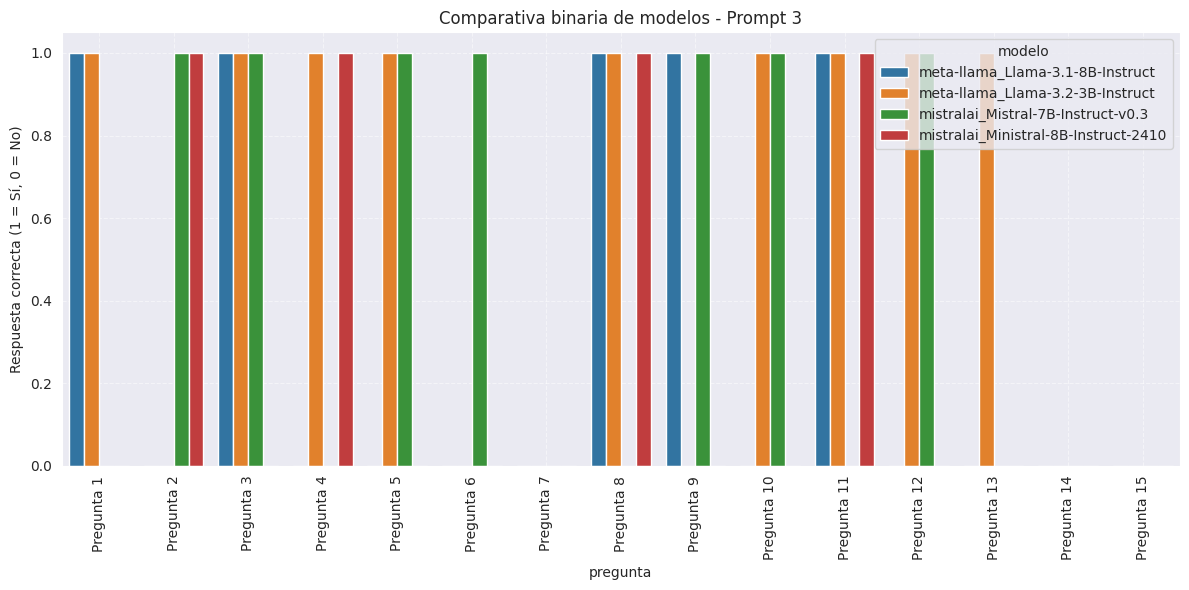

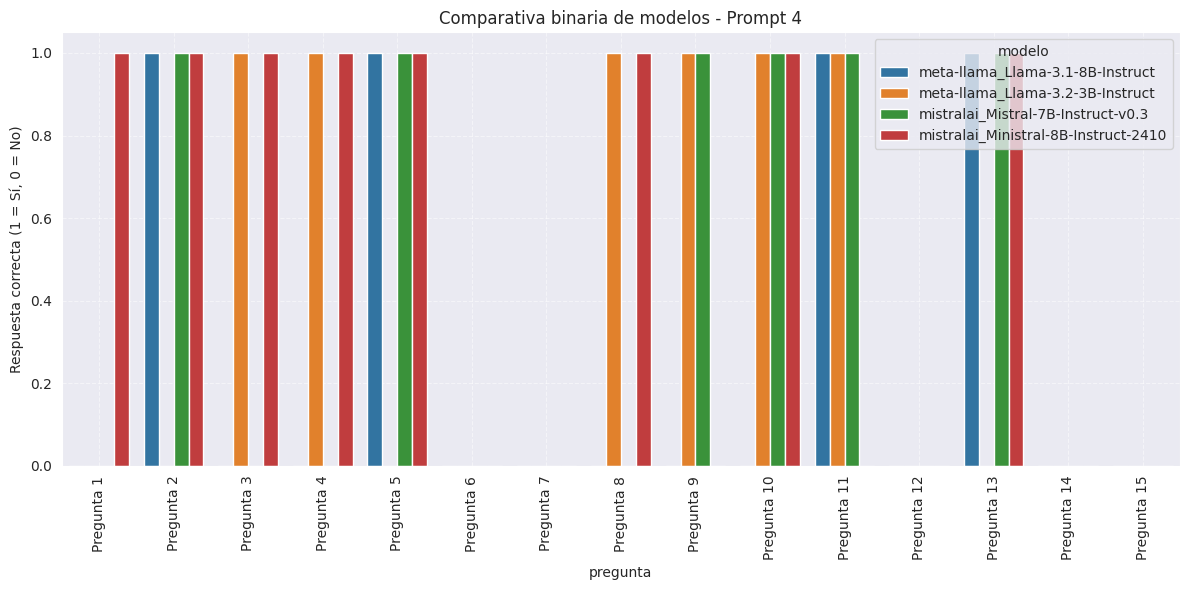

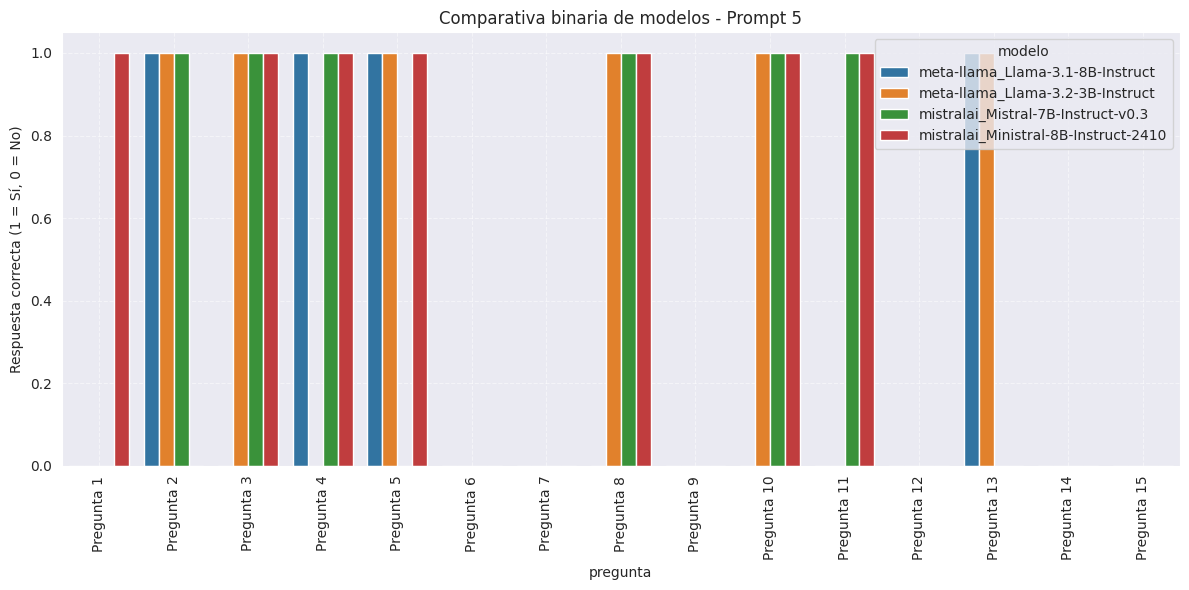

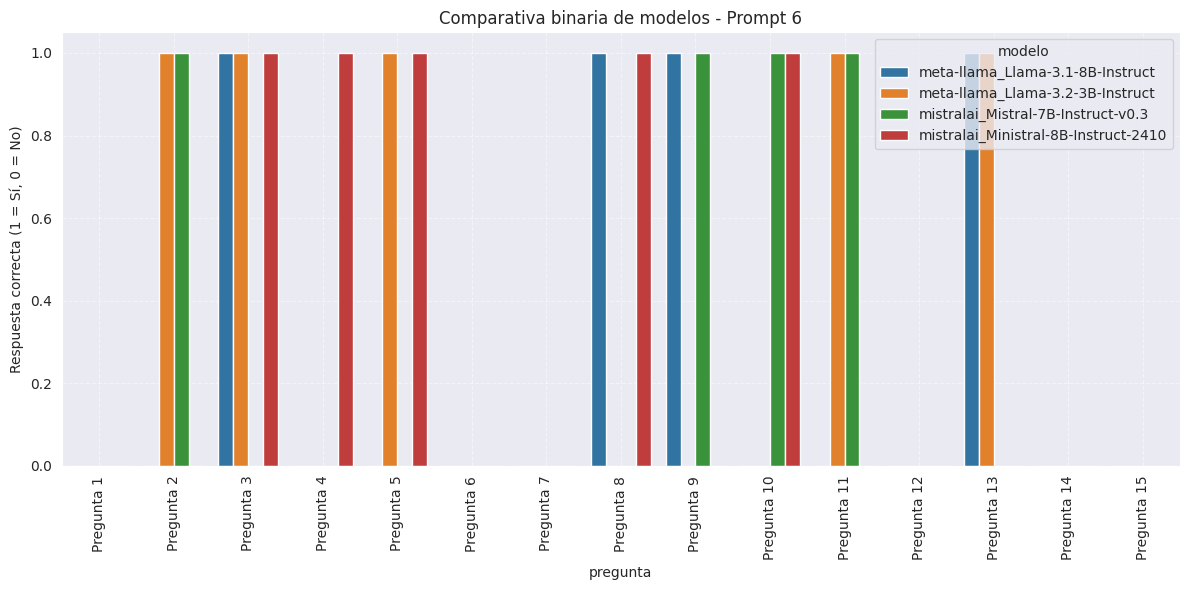

In [114]:
df_resultados_deberta=pd.read_csv("resultados_xlm_roberta.csv")

df_deberta_one=df_resultados_deberta.copy()
preguntas = [
    "Pregunta 1", "Pregunta 2", "Pregunta 3", "Pregunta 4", "Pregunta 5",
    "Pregunta 6", "Pregunta 7", "Pregunta 8", "Pregunta 9", "Pregunta 10",
    "Pregunta 11", "Pregunta 12", "Pregunta 13", "Pregunta 14", "Pregunta 15"
]

# === Gráficas comparativas: todos los modelos para un mismo prompt ===
for prompt in prompts:
    df_prompt = df_deberta_one[df_deberta_one["prompt"] == prompt]

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_prompt, x="pregunta", y="es_correcta", hue="modelo", errorbar=None)

    plt.xticks(range(0, len(df_prompt["pregunta"].unique())),
               preguntas[:len(df_prompt["pregunta"].unique())],
               rotation=90)
    plt.ylabel("Respuesta correcta (1 = Sí, 0 = No)")
    plt.title(f"Comparativa binaria de modelos - {prompt}")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

### Otros Analisis

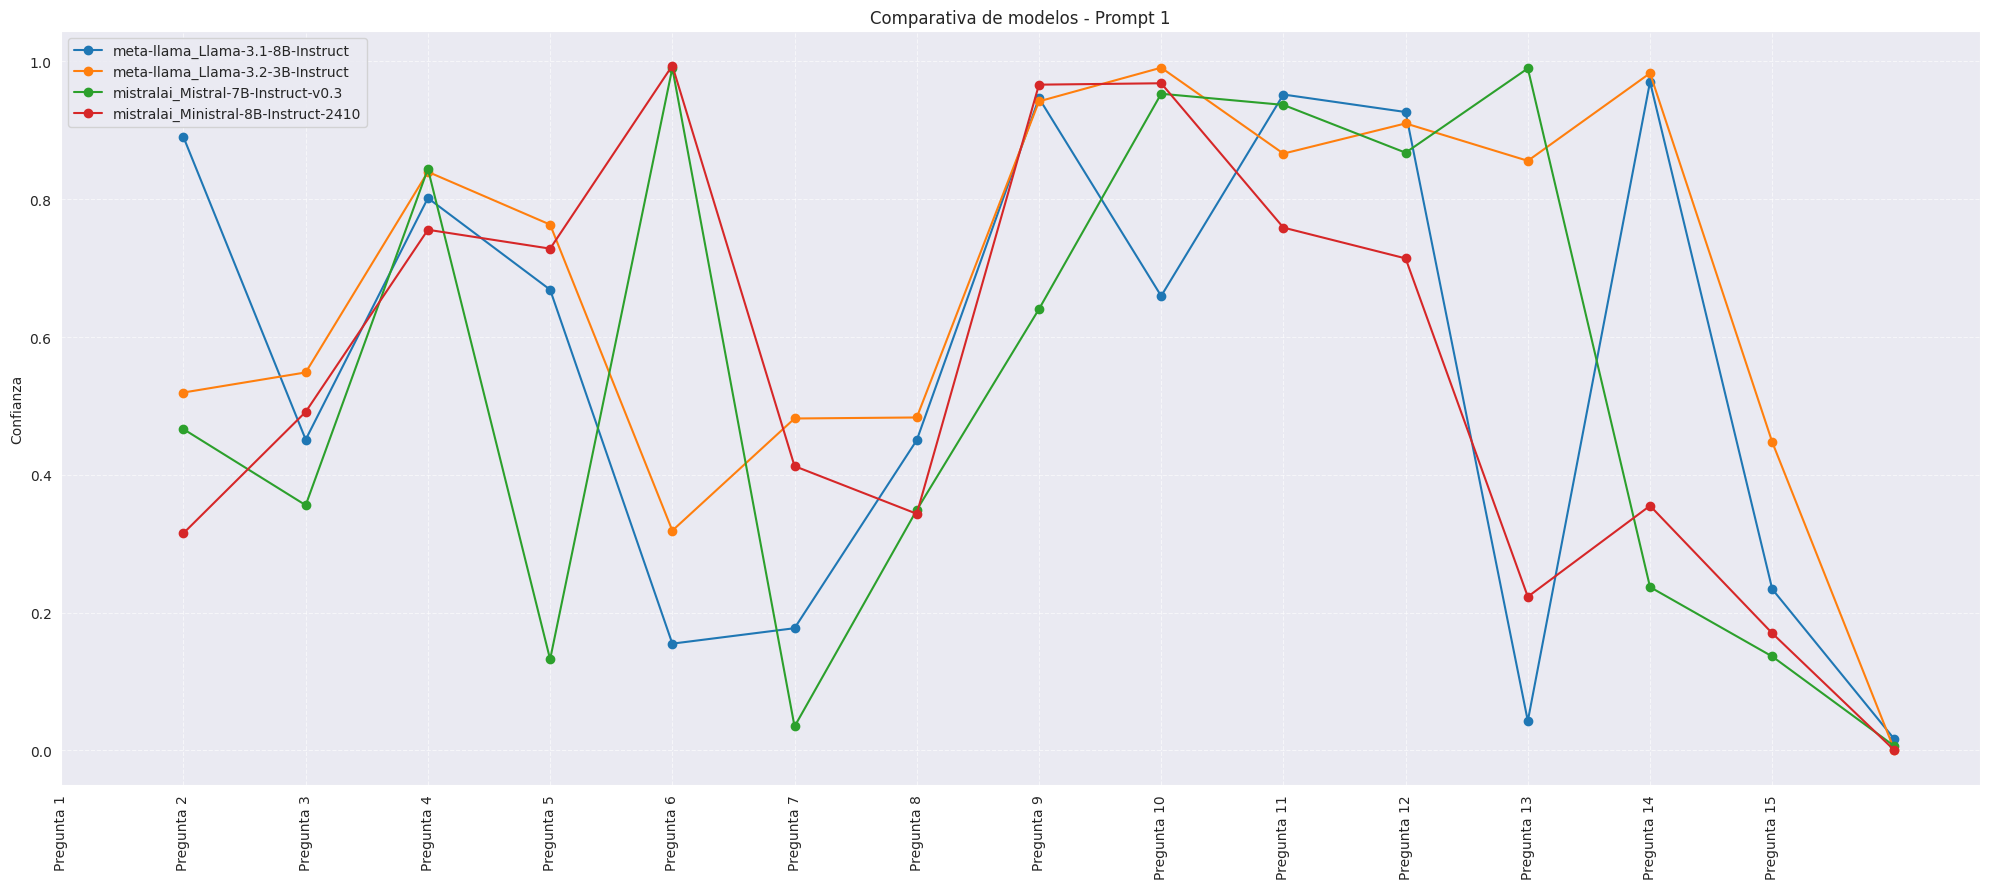

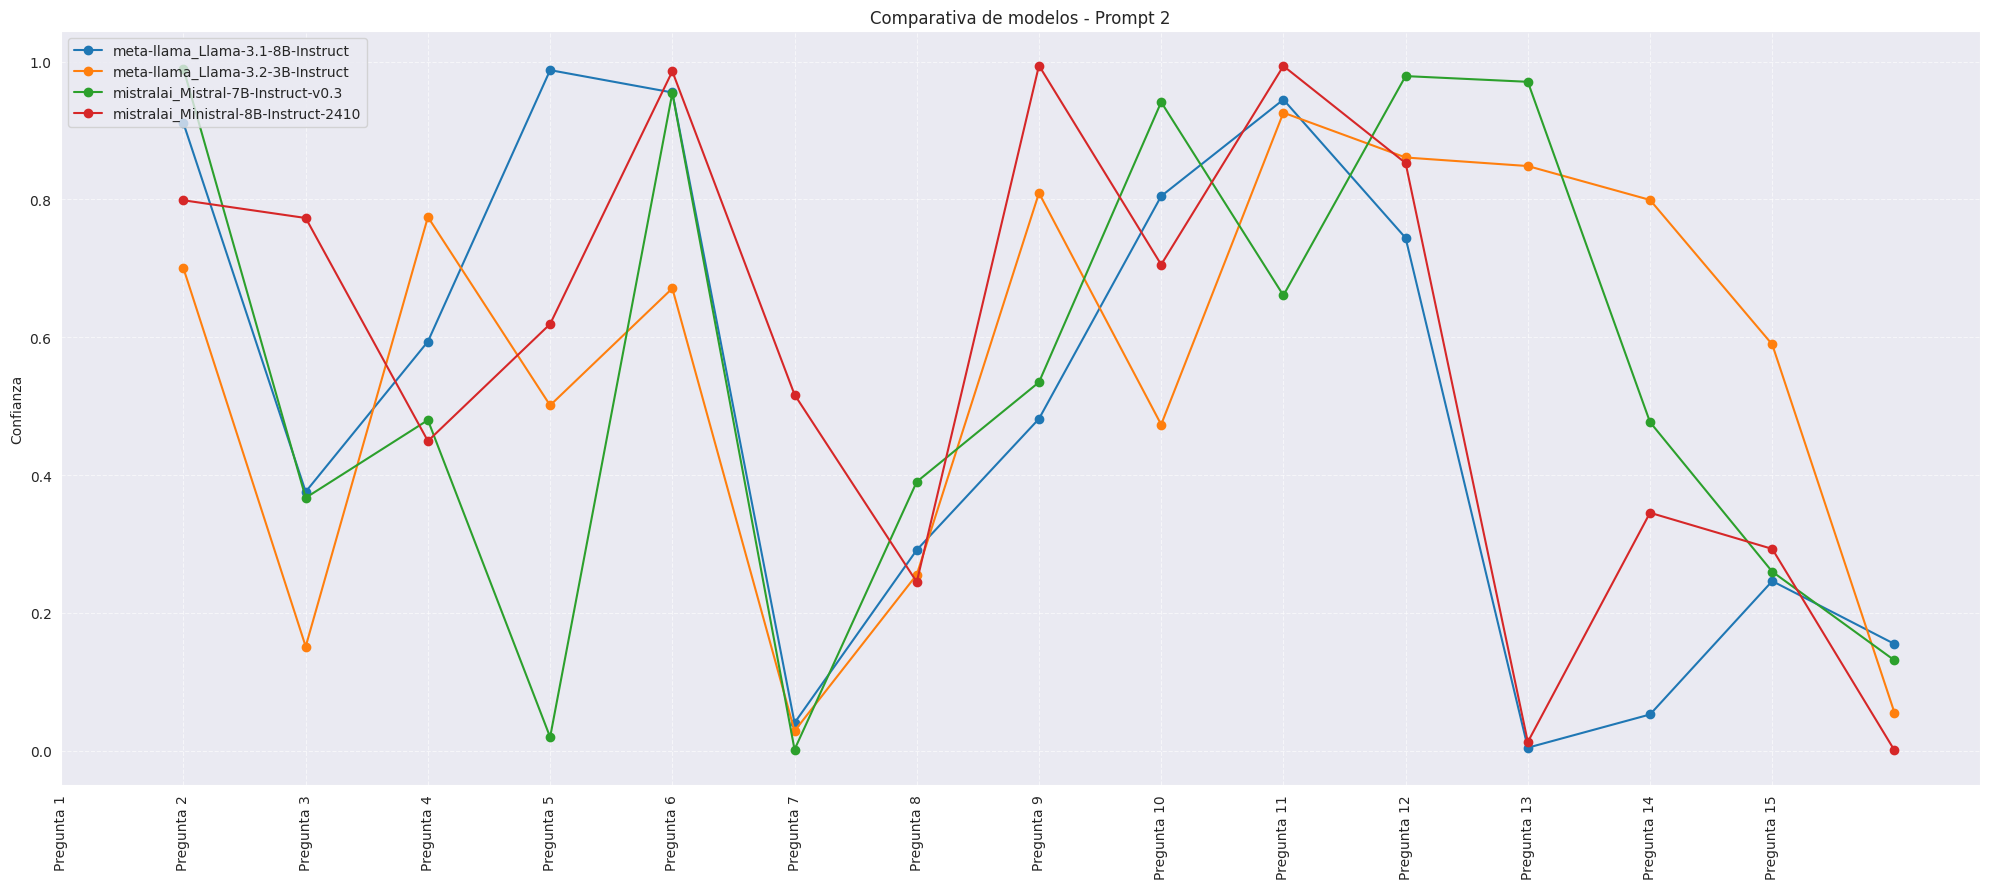

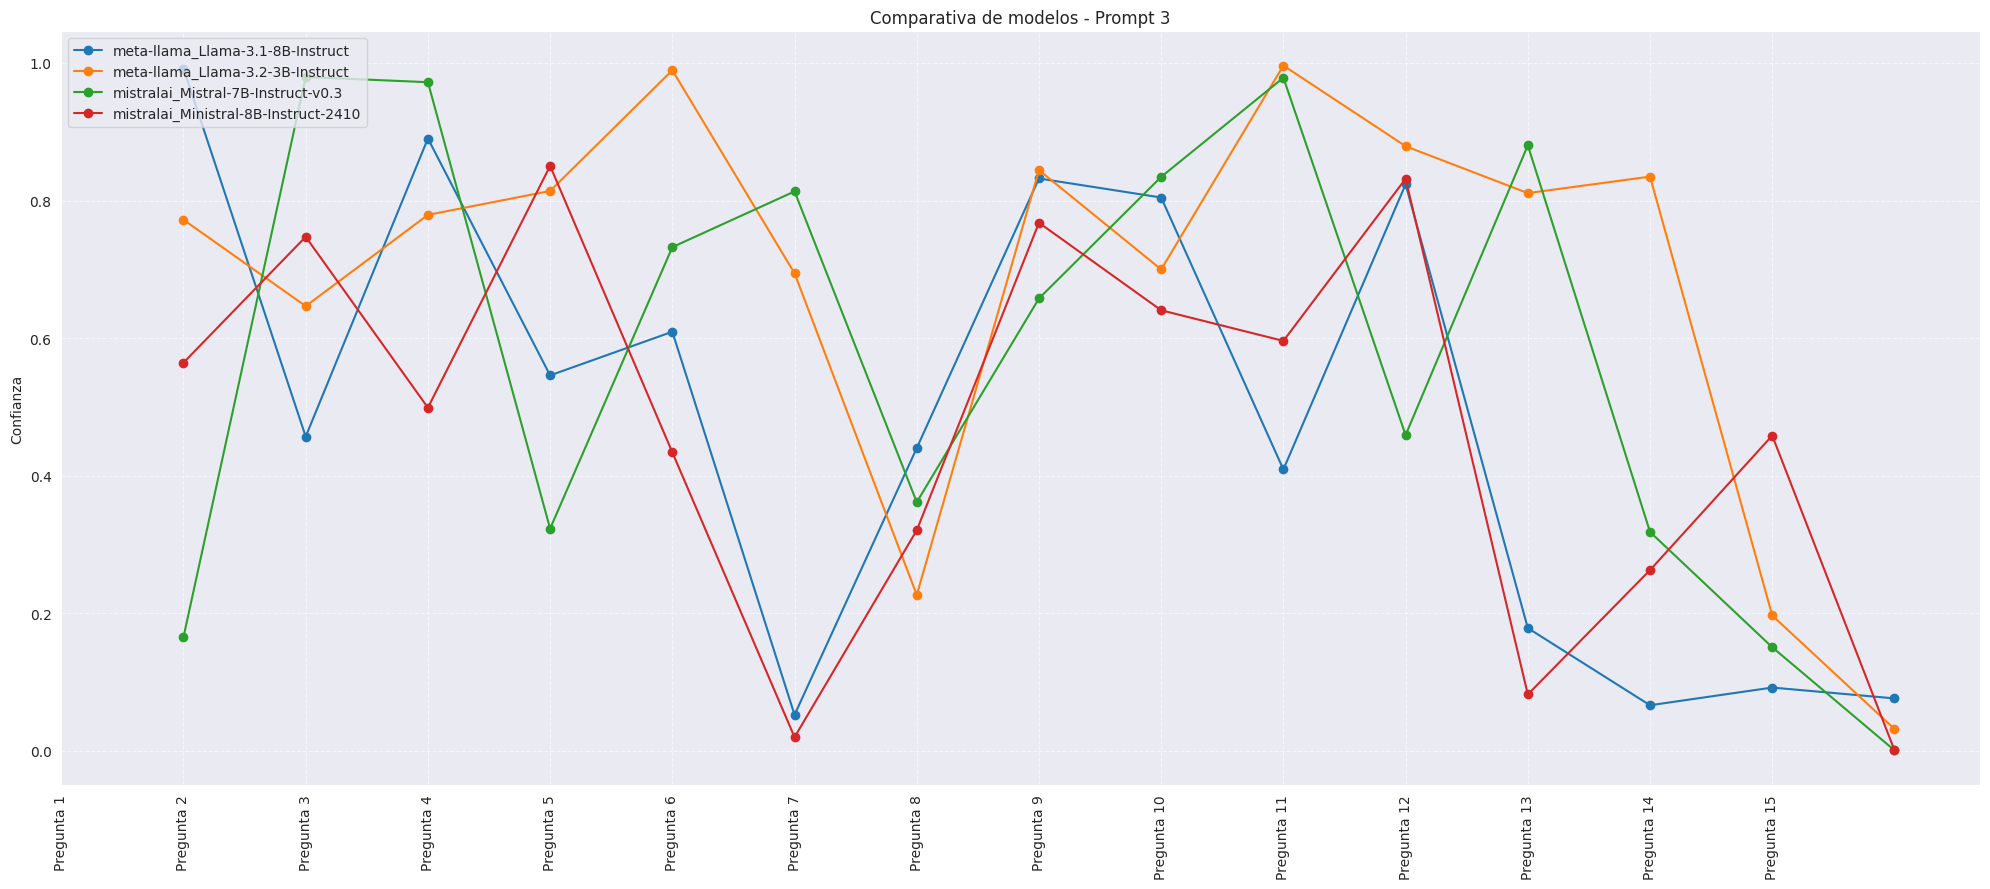

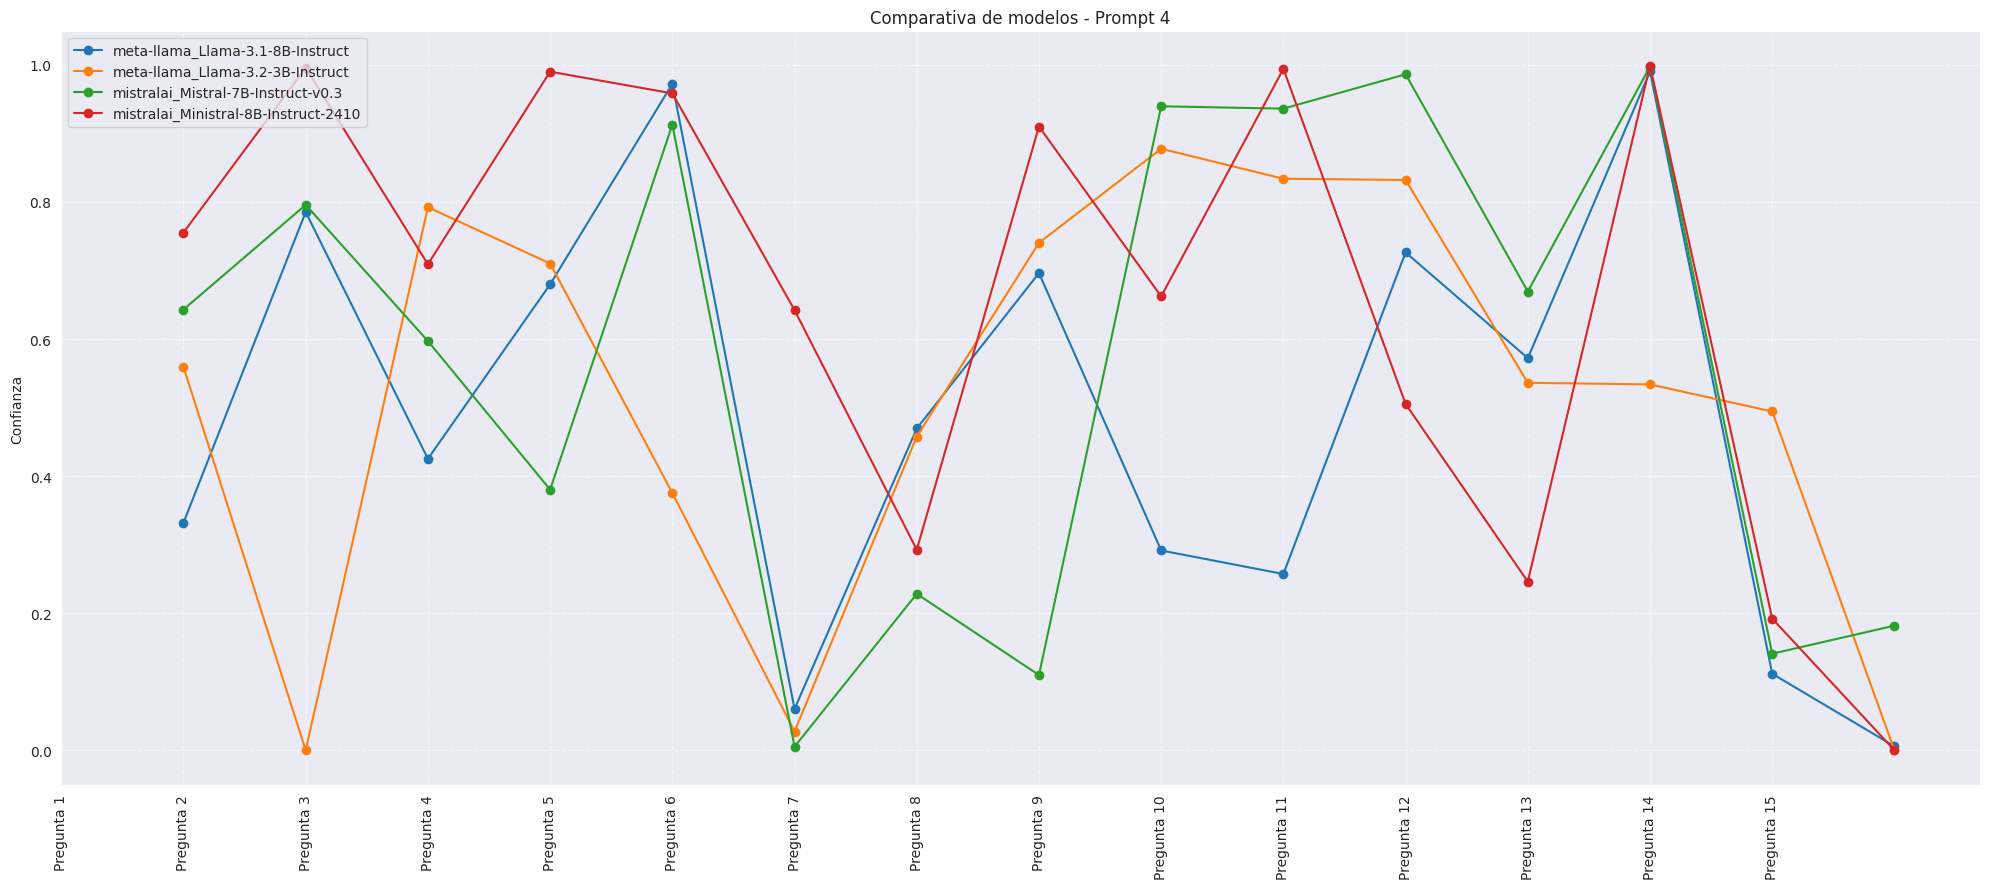

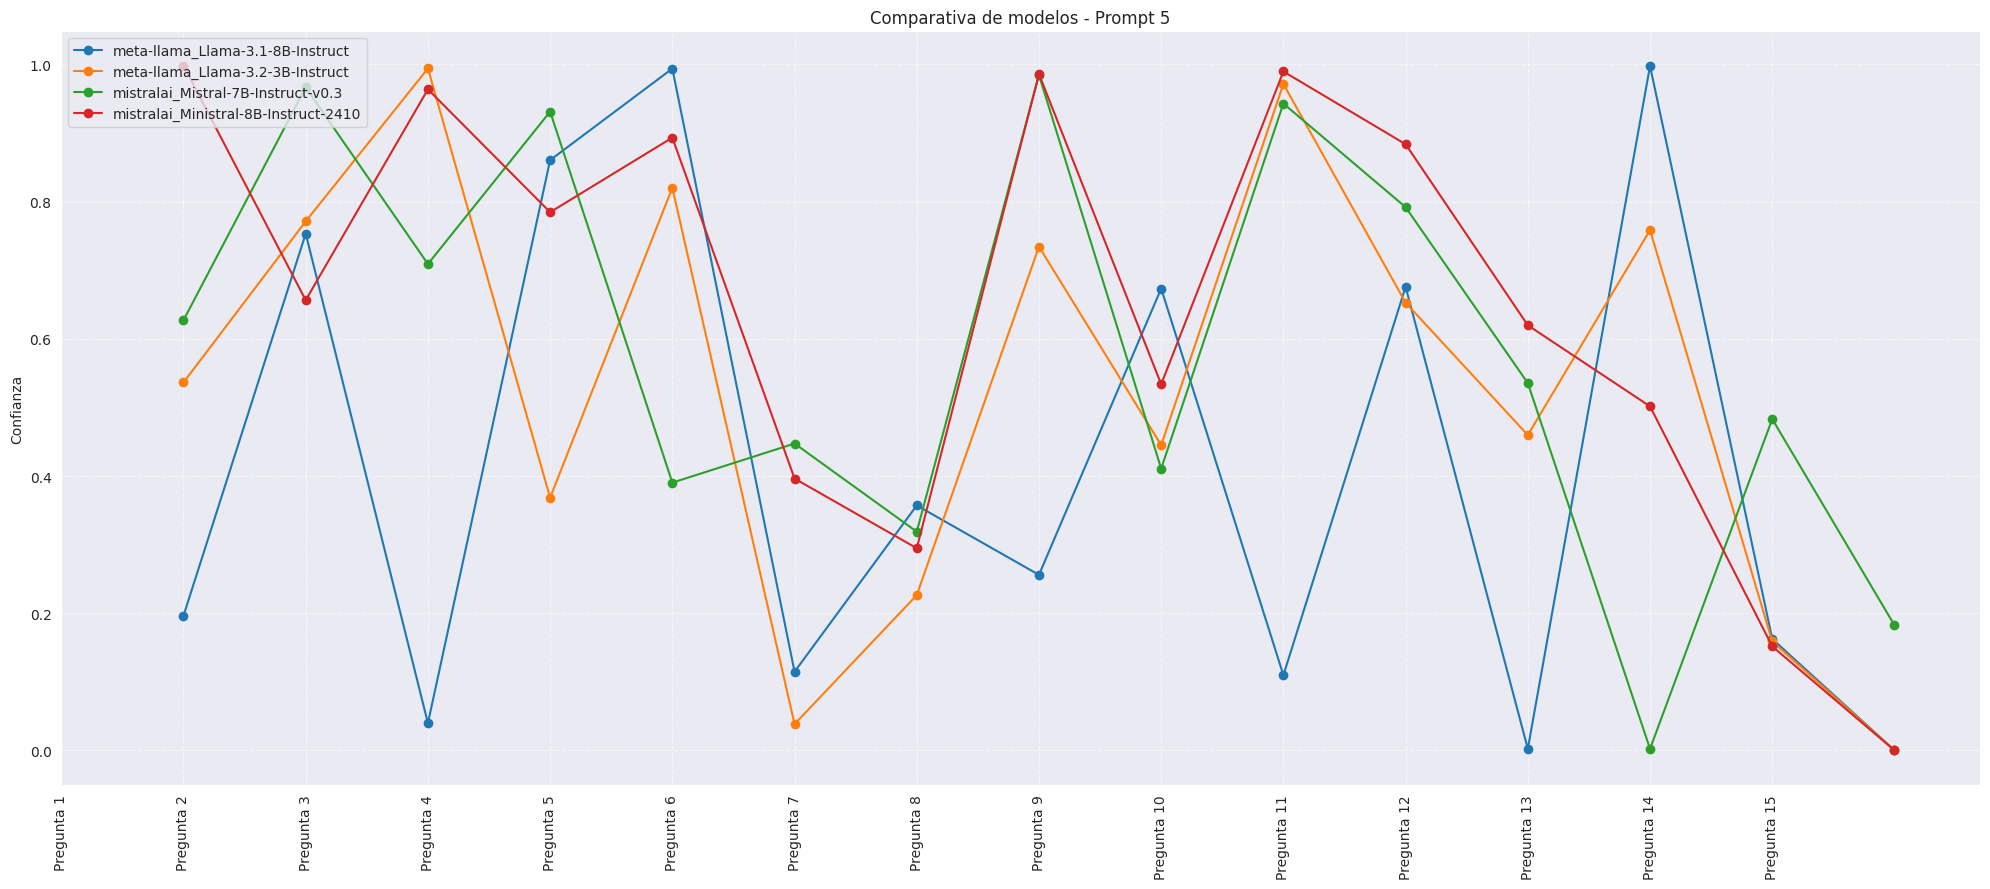

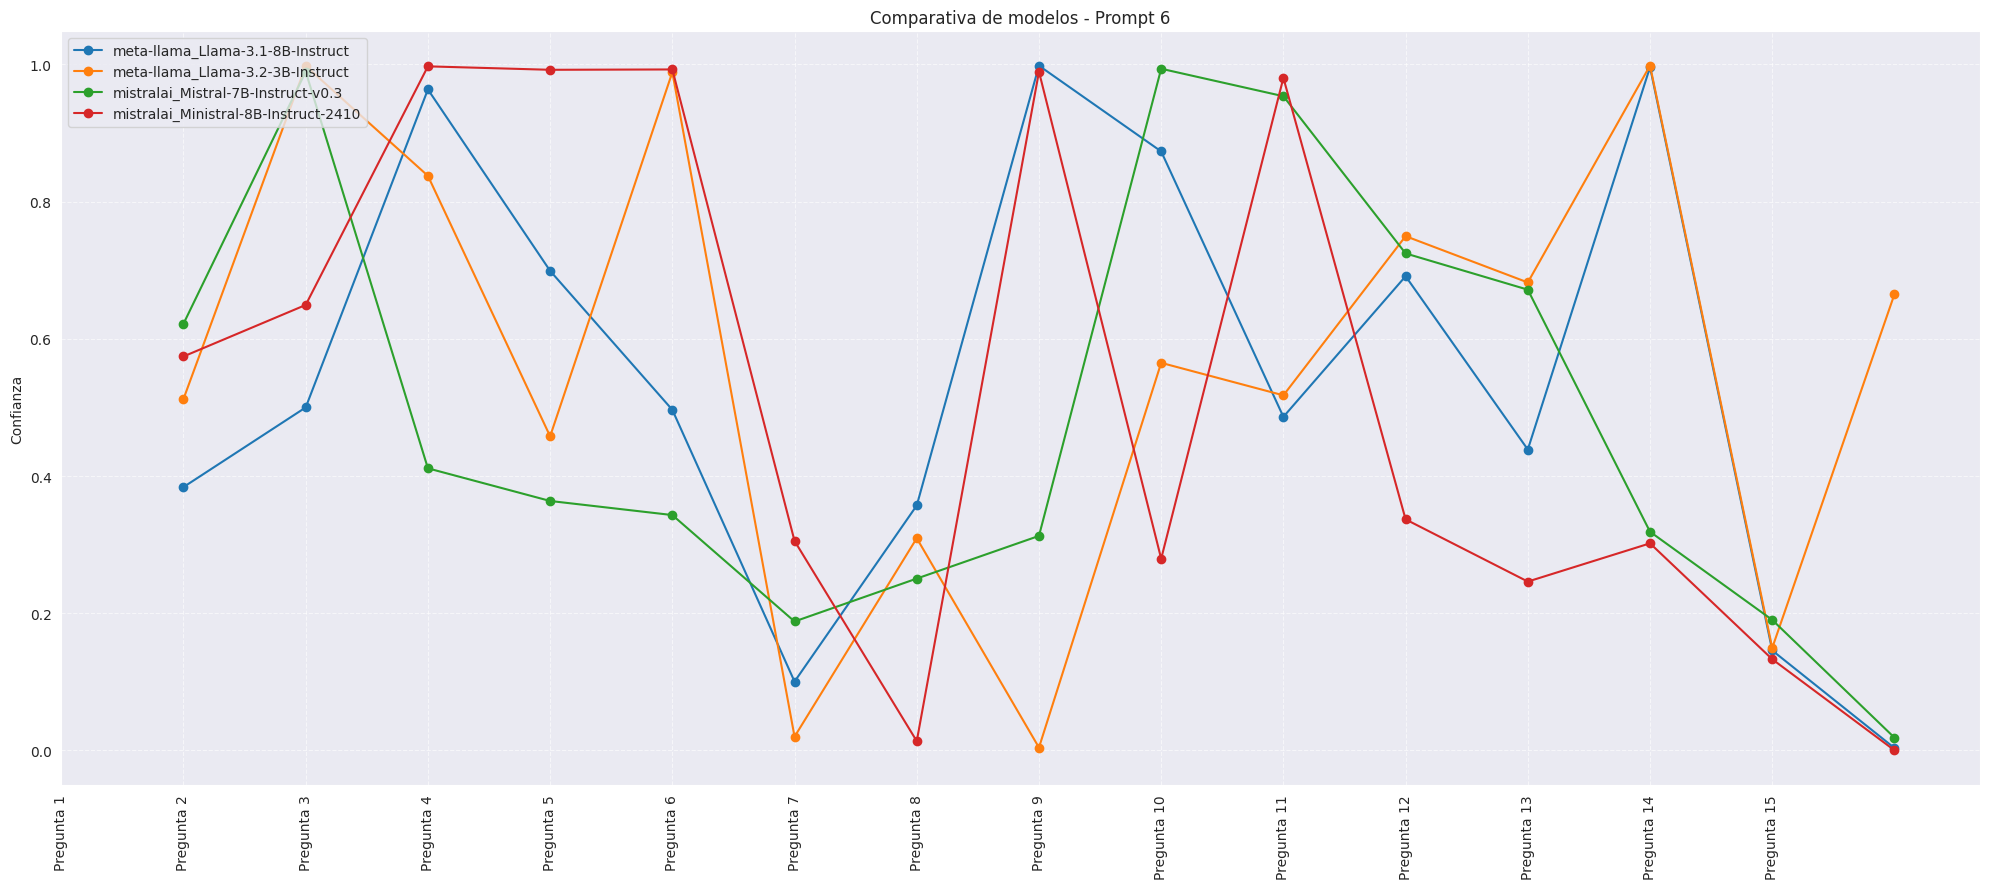

In [115]:
for prompt in prompts:
    plt.figure(figsize=(20, 9))
    df_prompt = df_deberta_one[df_deberta_one["prompt"] == prompt]

    for modelo in df_prompt["modelo"].unique():
        df_modelo = df_prompt[df_prompt["modelo"] == modelo]
        plt.plot(
            range(1, len(df_modelo) + 1),
            df_modelo["confianza"],
            marker='o',
            linestyle='-',
            label=modelo
        )

    plt.xticks(range(0, len(df_prompt["pregunta"].unique())),
               preguntas[:len(df_prompt["pregunta"].unique())],
               rotation=90)
    plt.ylabel("Confianza")
    plt.title(f"Comparativa de modelos - {prompt}")
    plt.legend(loc="upper left")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

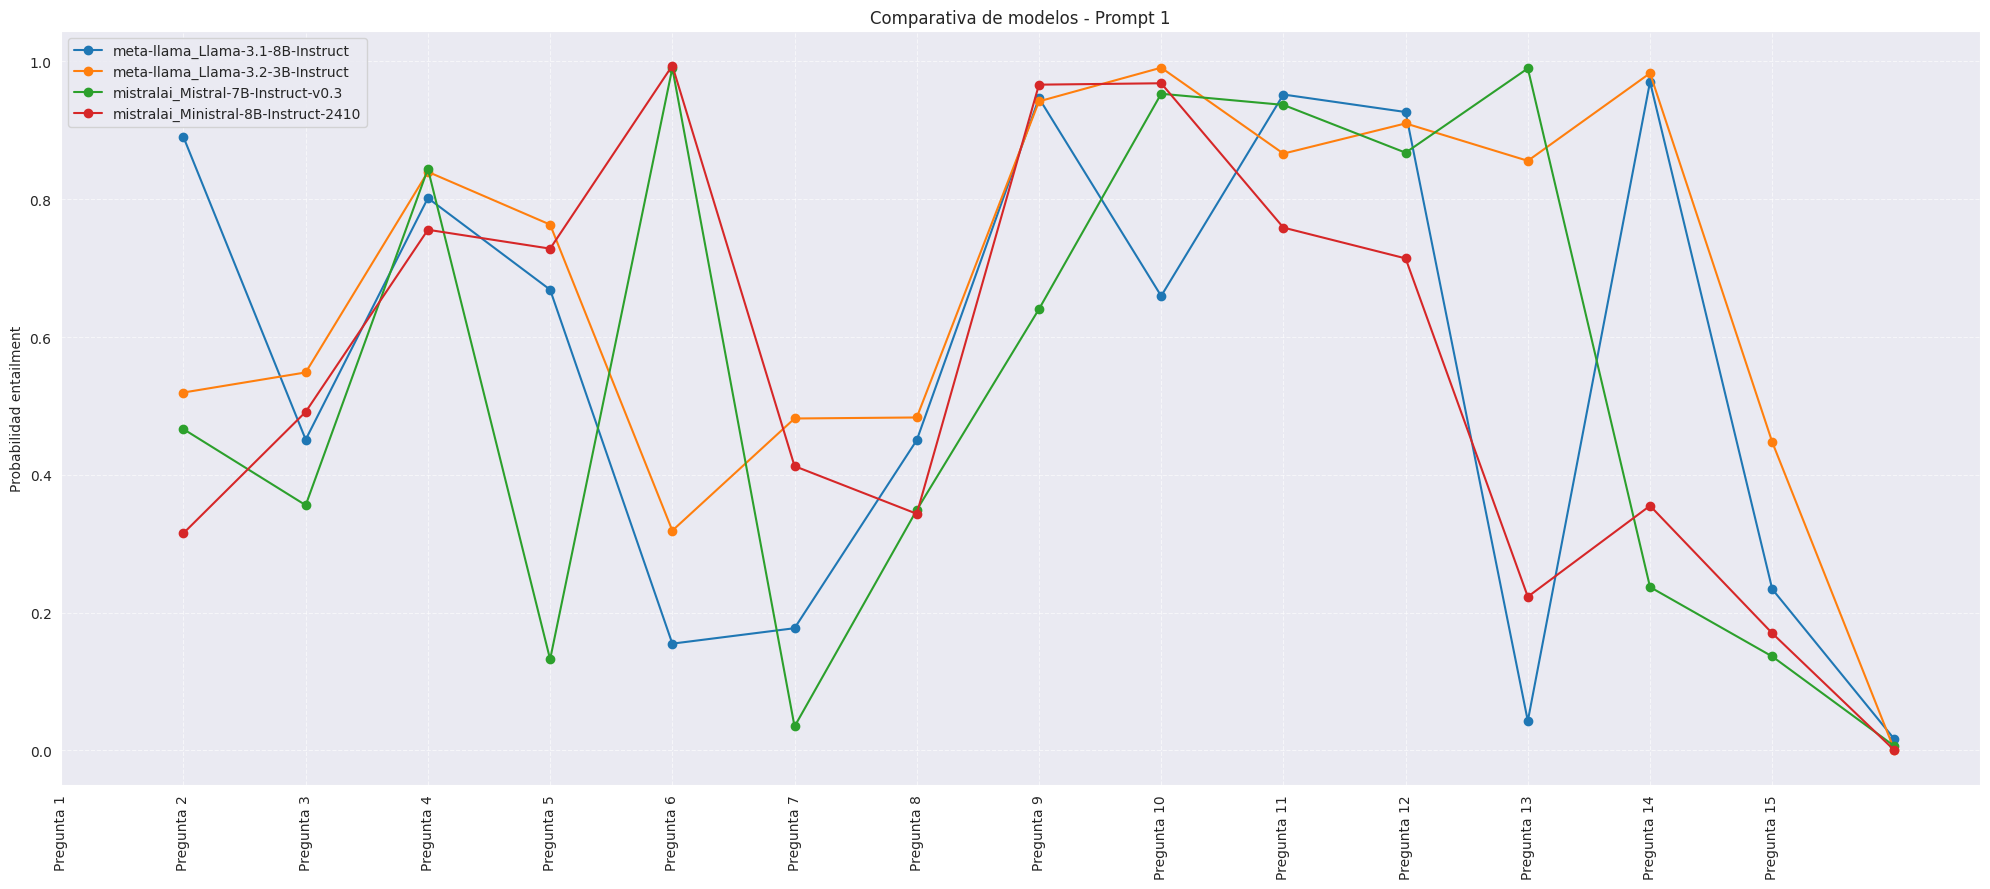

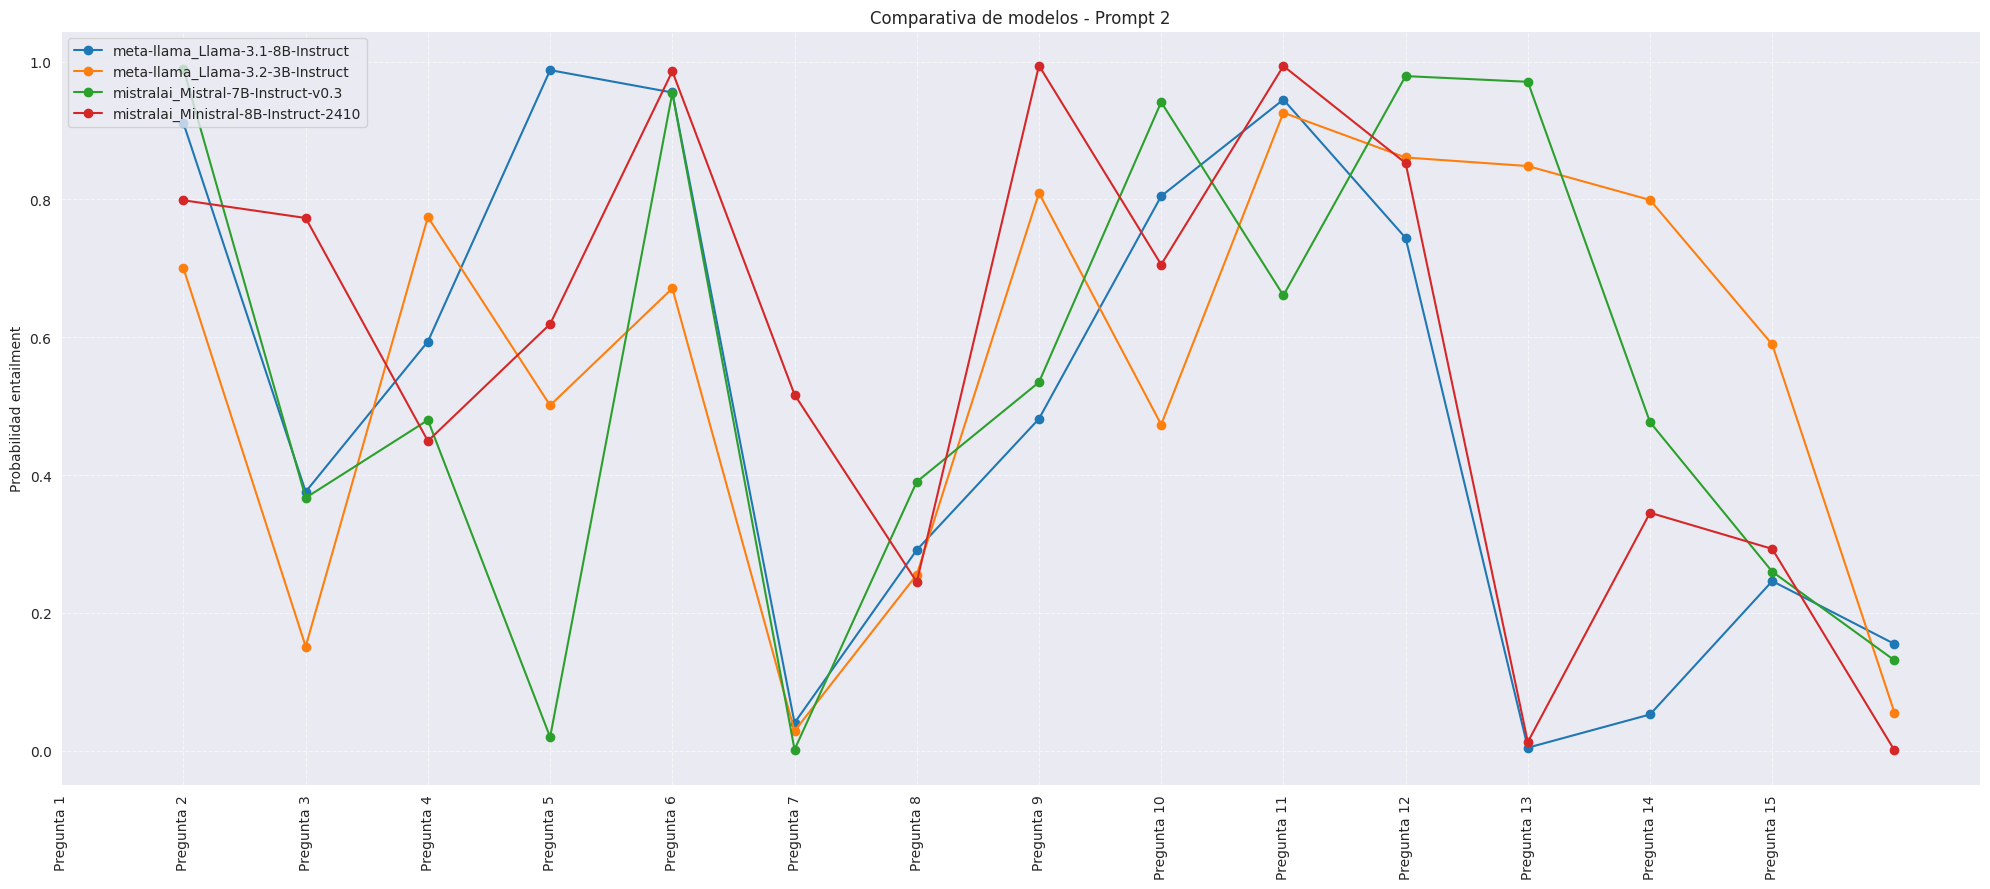

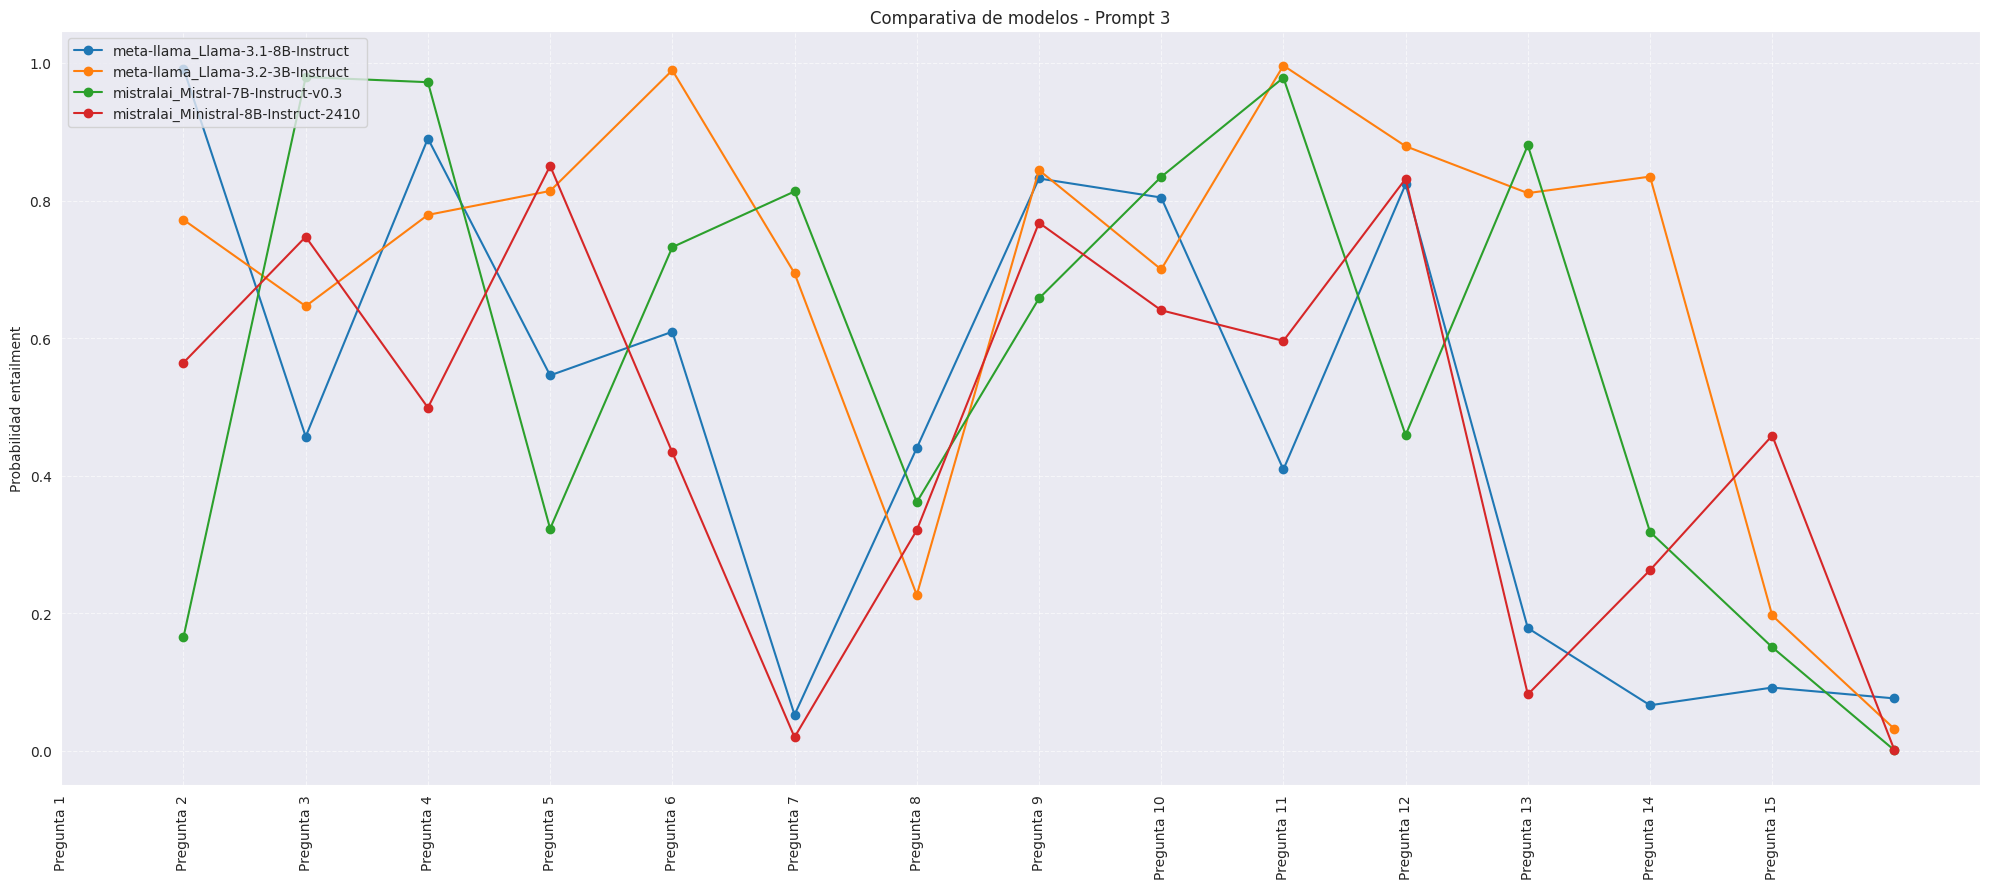

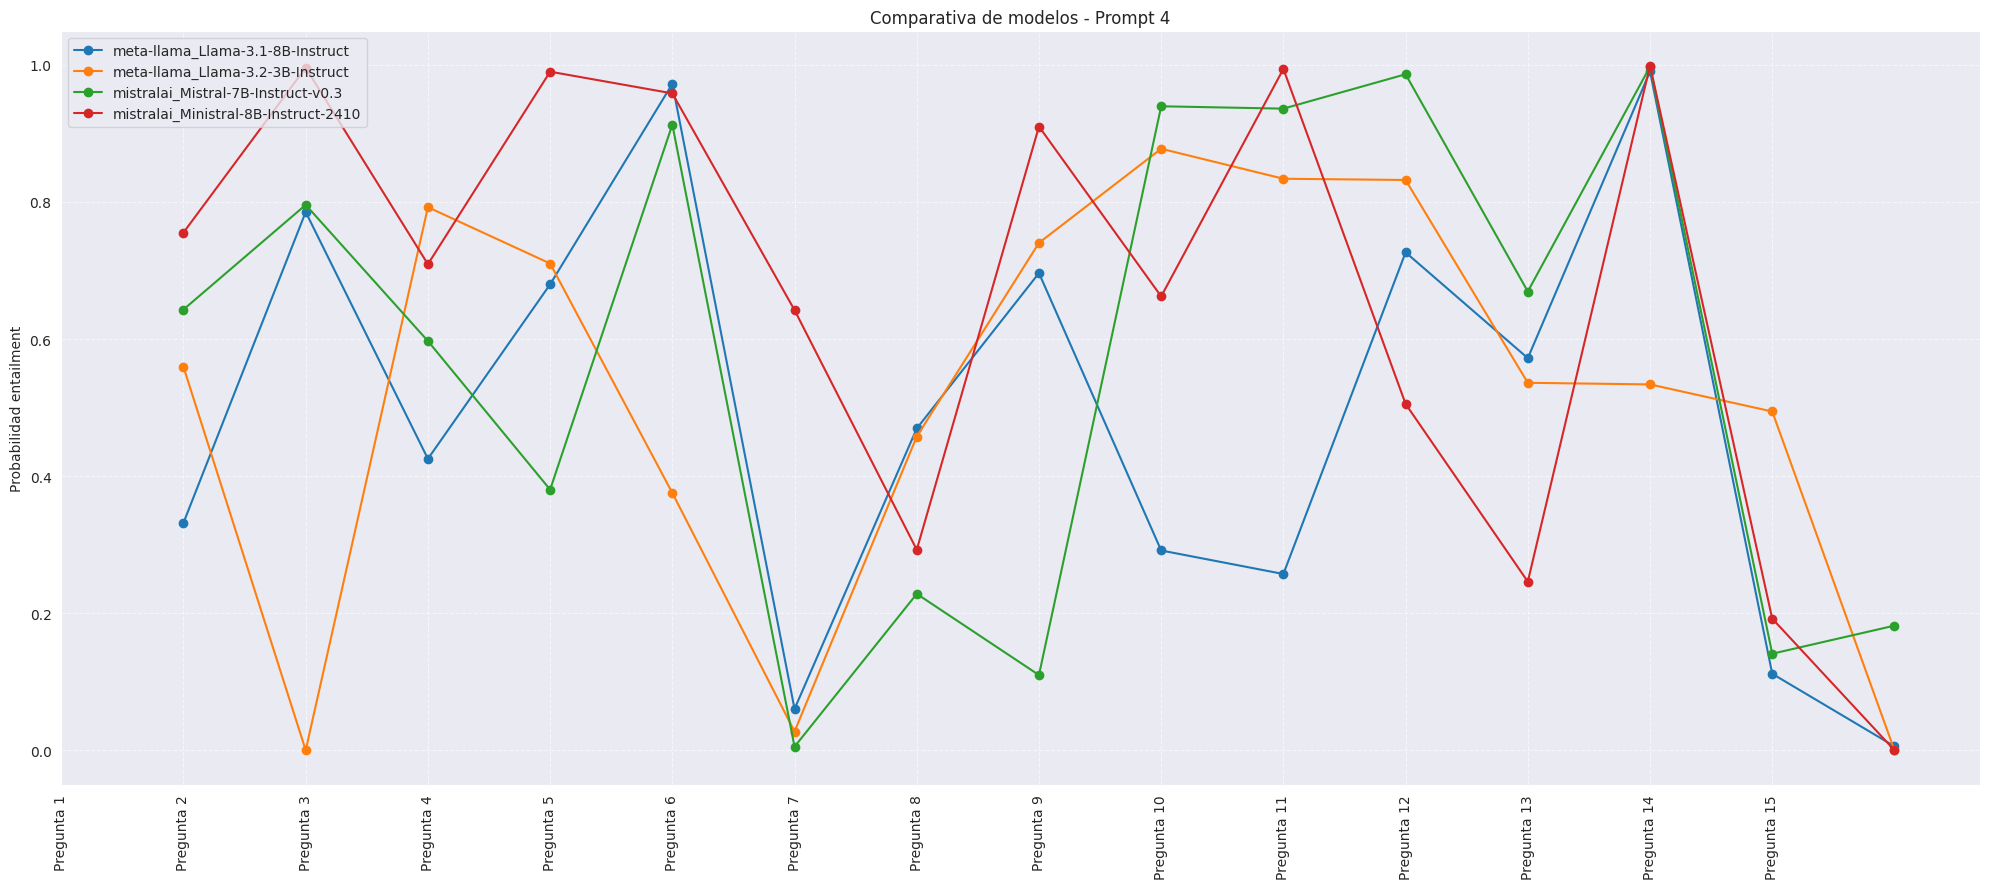

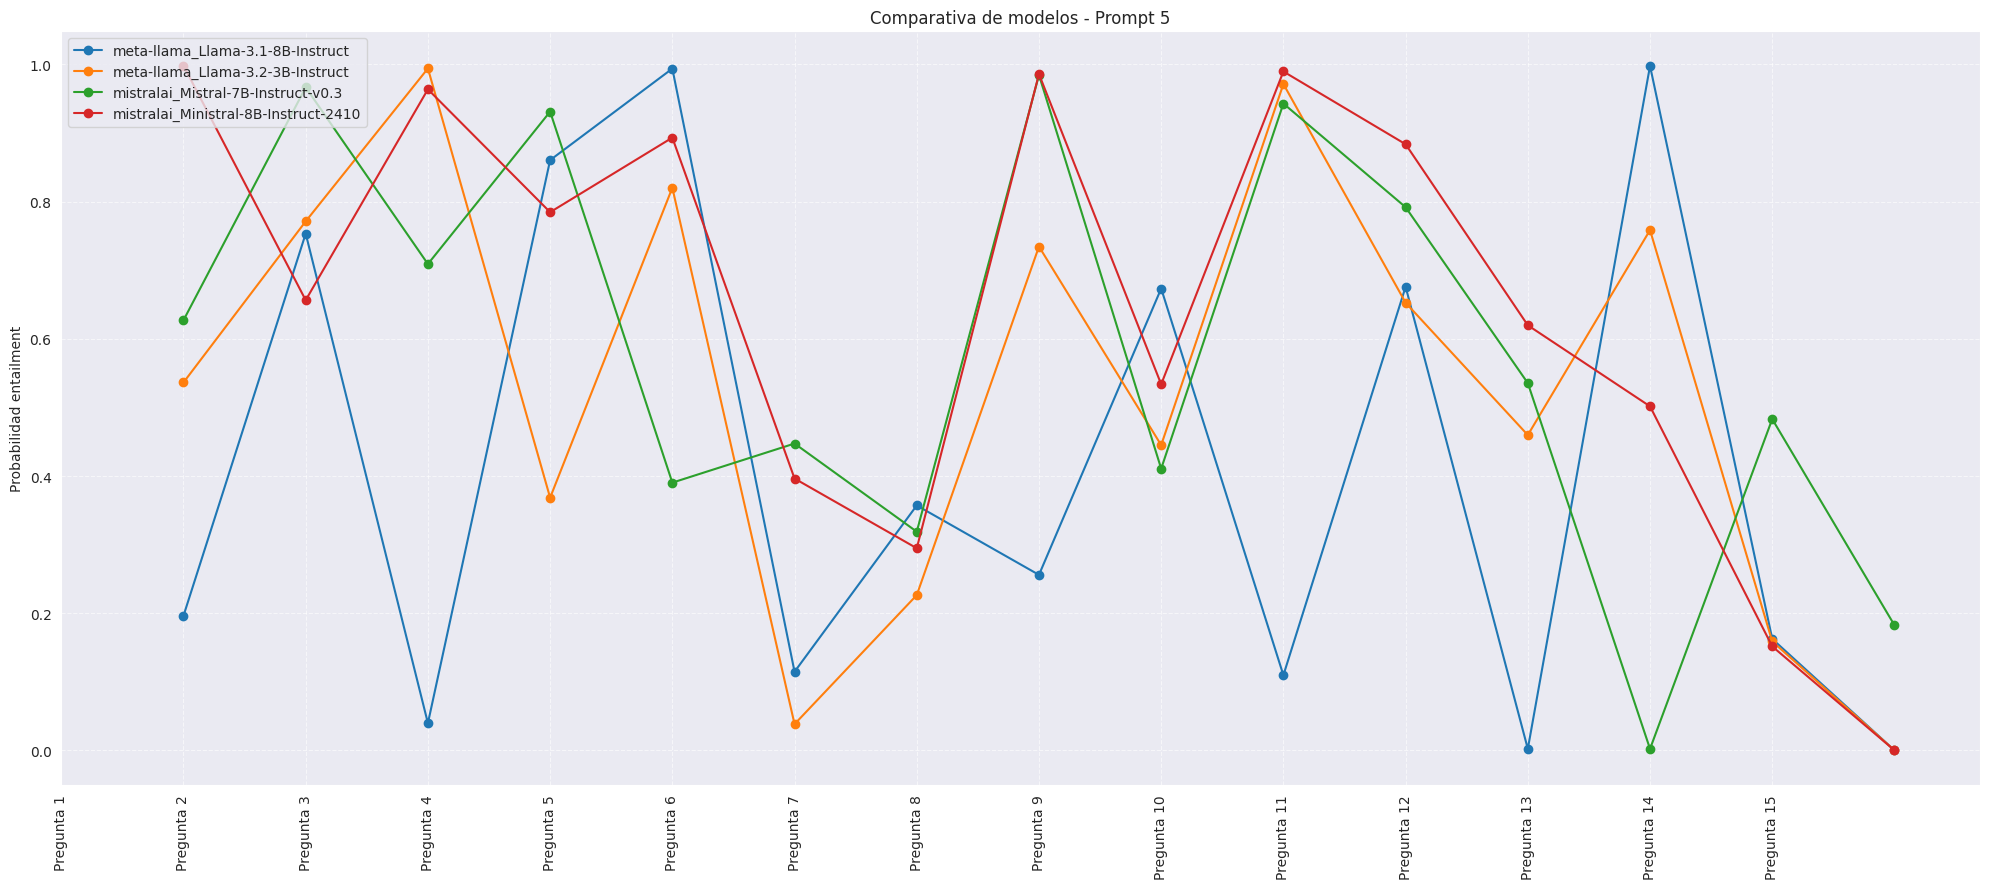

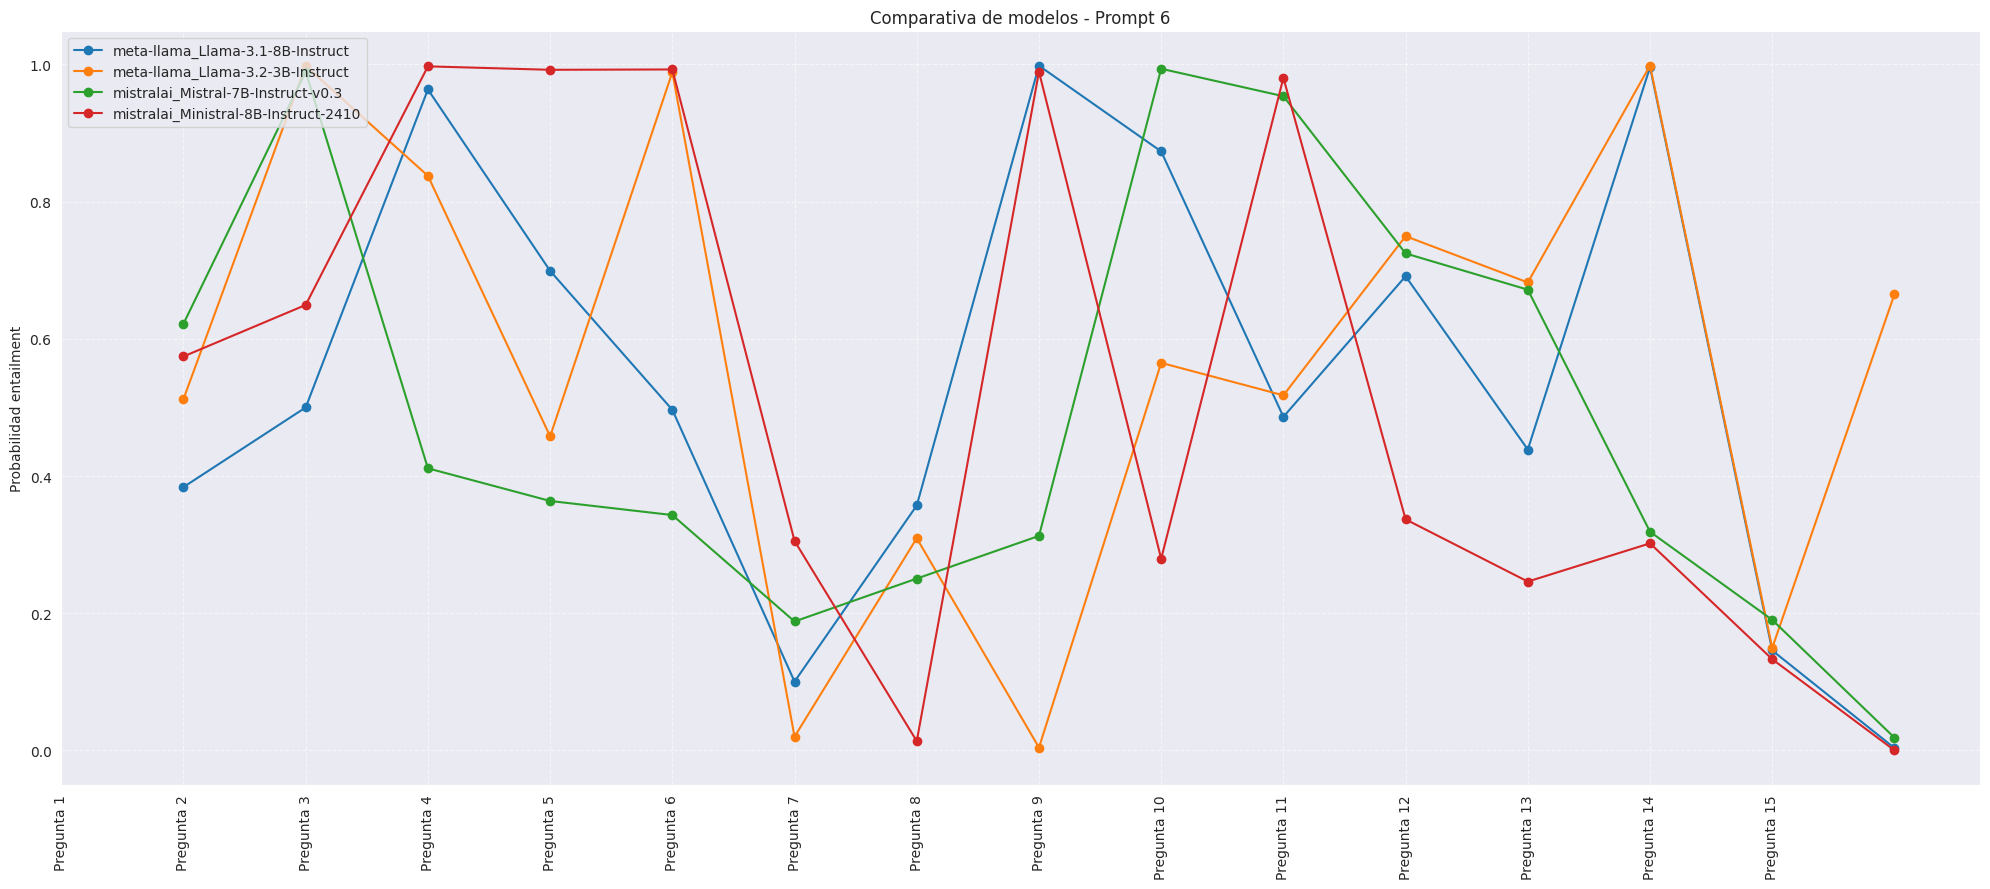

In [116]:
for prompt in prompts:
    plt.figure(figsize=(20, 9))
    df_prompt = df_deberta_one[df_deberta_one["prompt"] == prompt]

    for modelo in df_prompt["modelo"].unique():
        df_modelo = df_prompt[df_prompt["modelo"] == modelo]
        plt.plot(
            range(1, len(df_modelo) + 1),
            df_modelo["prob_entailment"],
            marker='o',
            linestyle='-',
            label=modelo
        )

    plt.xticks(range(0, len(df_prompt["pregunta"].unique())),
               preguntas[:len(df_prompt["pregunta"].unique())],
               rotation=90)
    plt.ylabel("Probabilidad entailment")
    plt.title(f"Comparativa de modelos - {prompt}")
    plt.legend(loc="upper left")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [117]:
for prompt in prompts:
    plt.figure(figsize=(20, 9))
    df_prompt = df_deberta_one[df_deberta_one["prompt"] == prompt]

    for modelo in df_prompt["modelo"].unique():
        df_modelo = df_prompt[df_prompt["modelo"] == modelo]
        plt.plot(
            range(1, len(df_modelo) + 1),
            df_modelo["prob_neutral"],
            marker='o',
            linestyle='-',
            label=modelo
        )

    plt.xticks(range(0, len(df_prompt["pregunta"].unique())),
               preguntas[:len(df_prompt["pregunta"].unique())],
               rotation=90)
    plt.ylabel("Probabilidad neutral")
    plt.title(f"Comparativa de modelos - {prompt}")
    plt.legend(loc="upper left")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

KeyError: 'prob_neutral'

<Figure size 2000x900 with 0 Axes>

In [ ]:
for prompt in prompts:
    plt.figure(figsize=(20, 9))
    df_prompt = df_deberta_one[df_deberta_one["prompt"] == prompt]

    for modelo in df_prompt["modelo"].unique():
        df_modelo = df_prompt[df_prompt["modelo"] == modelo]
        plt.plot(
            range(1, len(df_modelo) + 1),
            df_modelo["prob_contradiction"],
            marker='o',
            linestyle='-',
            label=modelo
        )

    plt.xticks(range(1, len(df_prompt["pregunta"].unique()) + 1),
               preguntas[:len(df_prompt["pregunta"].unique())],
               rotation=90)
    plt.ylabel("Probabilidad contradiction")
    plt.title(f"Comparativa de modelos - {prompt}")
    plt.legend(loc="upper left")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()